## Section C : Algorithm implementation using packages

### References :
1. https://www.analyticsvidhya.com/blog/2024/02/pair-plots-in-machine-learning/
2. https://www.greydongilmore.com/courses/ml_intro/02_05_plotting_categorical/#:~:text=boxplots%20and%20violinplots%20are%20used,levels%20of%20a%20categorical%20variable
3. https://umap-learn.readthedocs.io/en/latest/supervised.html
4. https://umap-learn.readthedocs.io/en/latest/transform.html

5. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
6. https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
7. https://stackoverflow.com/questions/47786637/how-to-handle-category-mismatch-after-onehotencoding-from-test-data-while-predic
8. https://jamesmccaffrey.wordpress.com/2023/08/04/how-to-encode-categorical-data-for-linear-ridge-regression/
9. https://www.greydongilmore.com/courses/ml_intro/02_05_plotting_categorical/#:~:text=boxplots%20and%20violinplots%20are%20used,levels%20of%20a%20categorical%20variable
10. https://seaborn.pydata.org/generated/seaborn.boxplot.html
11. https://www.analyticsvidhya.com/blog/2024/02/pair-plots-in-machine-learning/
12. https://umap-learn.readthedocs.io/en/latest/basic_usage.html
13. https://medium.com/@hsu.lihsiang.esth/feature-selection-with-recursive-feature-elimination-rfe-for-parisian-bike-count-data-23f0ce9db691
14. https://www.geeksforgeeks.org/ml-one-hot-encoding/



In [ ]:
pip install umap-learn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import umap

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [4]:
'''
Read given csv file , stored in the variable ( df )

'''

df = pd.read_csv("Electricity BILL.csv")
df.head()
temp = df
temp2 = df
temp_ica = df

In [5]:
'''

Information about the dataset :
Insights gained :
1250 total entries with 3 object type features and 12 int/float type features

'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Type                1250 non-null   object 
 1   Construction_Year            1250 non-null   int64  
 2   Number_of_Floors             1250 non-null   int64  
 3   Energy_Consumption_Per_SqM   1250 non-null   float64
 4   Water_Usage_Per_Building     1250 non-null   float64
 5   Waste_Recycled_Percentage    1250 non-null   float64
 6   Occupancy_Rate               1250 non-null   float64
 7   Indoor_Air_Quality           1250 non-null   float64
 8   Smart_Devices_Count          1250 non-null   int64  
 9   Green_Certified              1250 non-null   int64  
 10  Maintenance_Resolution_Time  1250 non-null   float64
 11  Building_Status              1250 non-null   object 
 12  Maintenance_Priority         1250 non-null   object 
 13  Energy_Per_SqM    

In [6]:
'''

Check for null values in the data
Insights : there are no null values obtained in the data

'''

df.isnull().sum()

Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64

### Part A : EDA ( Exploratory Data Analysis )  by creating pair plots, box plots, violin plots, count plots for categorical features, and a correlation heatmap

In [7]:
'''

features : stores the features in the data
target : stores the target value : the electricity bill corresponding to each data features

'''

features = df.drop(columns=['Electricity_Bill'])
target = df["Electricity_Bill"]

In [8]:
features2 = temp2.drop(columns=['Electricity_Bill'])
target2 = temp2["Electricity_Bill"]

In [9]:
features_ica = temp2.drop(columns=['Electricity_Bill'])
target_ica = temp2["Electricity_Bill"]

In [ ]:
df.describe()

Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
count        1250.000000       1250.000000                 1250.000000   
mean         1996.735200          7.118400                  108.745712   
std            15.696515          3.773456                   72.180593   
min          1970.000000          1.000000                   50.000000   
25%          1983.000000          4.000000                   50.000000   
50%          1996.000000          7.000000                   72.868797   
75%          2010.000000         11.000000                  154.658612   
max          2023.000000         13.000000                  250.000000   

       Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
count               1250.000000                1250.000000     1250.000000   
mean                 647.021156                  28.831580       77.285182   
std                  485.194992                  16.250126       15.093523   
min                  200.000000                   0.908321       17.600798   
25%                  200.000000                  15.948639       68.047227   
50%                  451.638391                  26.828853       80.355416   
75%                 1013.701569                  39.807403       88.977348   
max                 1500.000000                  80.886835       99.923707   

       Indoor_Air_Quality  Smart_Devices_Count  Green_Certified  \
count         1250.000000          1250.000000      1250.000000   
mean            40.517956             5.244000         0.237600   
std             33.705393             3.248524         0.425783   
min              0.034526             1.000000         0.000000   
25%             11.661954             3.000000         0.000000   
50%             29.959019             5.000000         0.000000   
75%             66.641693             7.000000         0.000000   
max            100.000000            20.000000         1.000000   

       Maintenance_Resolution_Time  Energy_Per_SqM  Number_of_Residents  \
count                  1250.000000     1250.000000          1250.000000   
mean                      9.617933      152.156367           251.764800   
std                       6.874172       48.567837           144.082406   
min                       5.000417       50.000000             1.000000   
25%                       5.942027      118.117412           127.250000   
50%                       7.607172      152.234583           261.000000   
75%                      10.514598      183.061704           375.750000   
max                      72.000000      300.000000           498.000000   

       Electricity_Bill  
count       1250.000000  
mean       15089.459765  
std         4974.536190  
min         2000.000000  
25%        11690.482925  
50%        15148.928890  
75%        18471.215980  
max        33887.449880

In [ ]:
features

Building_Type  Construction_Year  Number_of_Floors  \
0       Residential               1989                12   
1     Institutional               1980                 6   
2        Industrial               2006                10   
3        Commercial               1985                 1   
4        Industrial               2006                12   
...             ...                ...               ...   
1245    Residential               1985                10   
1246     Commercial               2007                 5   
1247     Commercial               1990                 1   
1248  Institutional               2021                 6   
1249    Residential               2017                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      50.000000                477.681762   
1                     225.759107                200.000000   
2                      98.755927                200.000000   
3                      68.470692                200.000000   
4                      50.000000                347.093644   
...                          ...                       ...   
1245                  147.613313                677.914745   
1246                   50.000000                861.042961   
1247                   50.000000               1500.000000   
1248                  250.000000               1500.000000   
1249                  143.821153               1500.000000   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                     48.417266       81.814110           13.780635   
1                     46.405516       45.109000           10.177771   
2                     17.247585       48.526225           27.757026   
3                     57.719480       76.335921            1.519812   
4                     26.936862       96.511319            1.874753   
...                         ...             ...                 ...   
1245                  29.602927       84.905237           51.340186   
1246                  23.576263       97.506525          100.000000   
1247                  46.190167       94.054395           13.554989   
1248                  55.807260       67.780207           13.554989   
1249                  13.855410       77.499626           13.554989   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                       6                0                     7.211768   
1                      10                0                    34.139492   
2                       2                1                     6.224612   
3                       2                0                     5.327398   
4                      19                0                     7.060854   
...                   ...              ...                          ...   
1245                    9                0                     8.304416   
1246                    5                0                     5.810473   
1247                    1                0                     6.761967   
1248                    6                0                    14.147058   
1249                    2                1                     5.844906   

        Building_Status Maintenance_Priority  Energy_Per_SqM  \
0     Under Maintenance                 High      174.835708   
1     Under Maintenance                 High      143.086785   
2           Operational               Medium      182.384427   
3                Closed                  Low      226.151493   
4                Closed               Medium      138.292331   
...                 ...                  ...             ...   
1245        Operational                  Low       88.802987   
1246             Closed                  Low      151.704173   
1247  Under Maintenance               Medium      111.501338   
1248        Operational               Medium      161.689296   
1249  Under Maintenance                  Low       72.205218   

      Number_of_R

In [ ]:
'''
Storing the categorical and numerical features from the data
'''

categorical_features = ["Building_Type","Green_Certified","Building_Status","Maintenance_Priority"]
numerical_features = ["Construction_Year","Number_of_Floors","Energy_Consumption_Per_SqM","Water_Usage_Per_Building","Waste_Recycled_Percentage","Occupancy_Rate","Indoor_Air_Quality","Smart_Devices_Count","Maintenance_Resolution_Time","Energy_Per_SqM","Number_of_Residents"]

In [ ]:
'''
Represent the all combined features
'''

all_features = categorical_features + numerical_features

<Figure size 640x480 with 0 Axes>

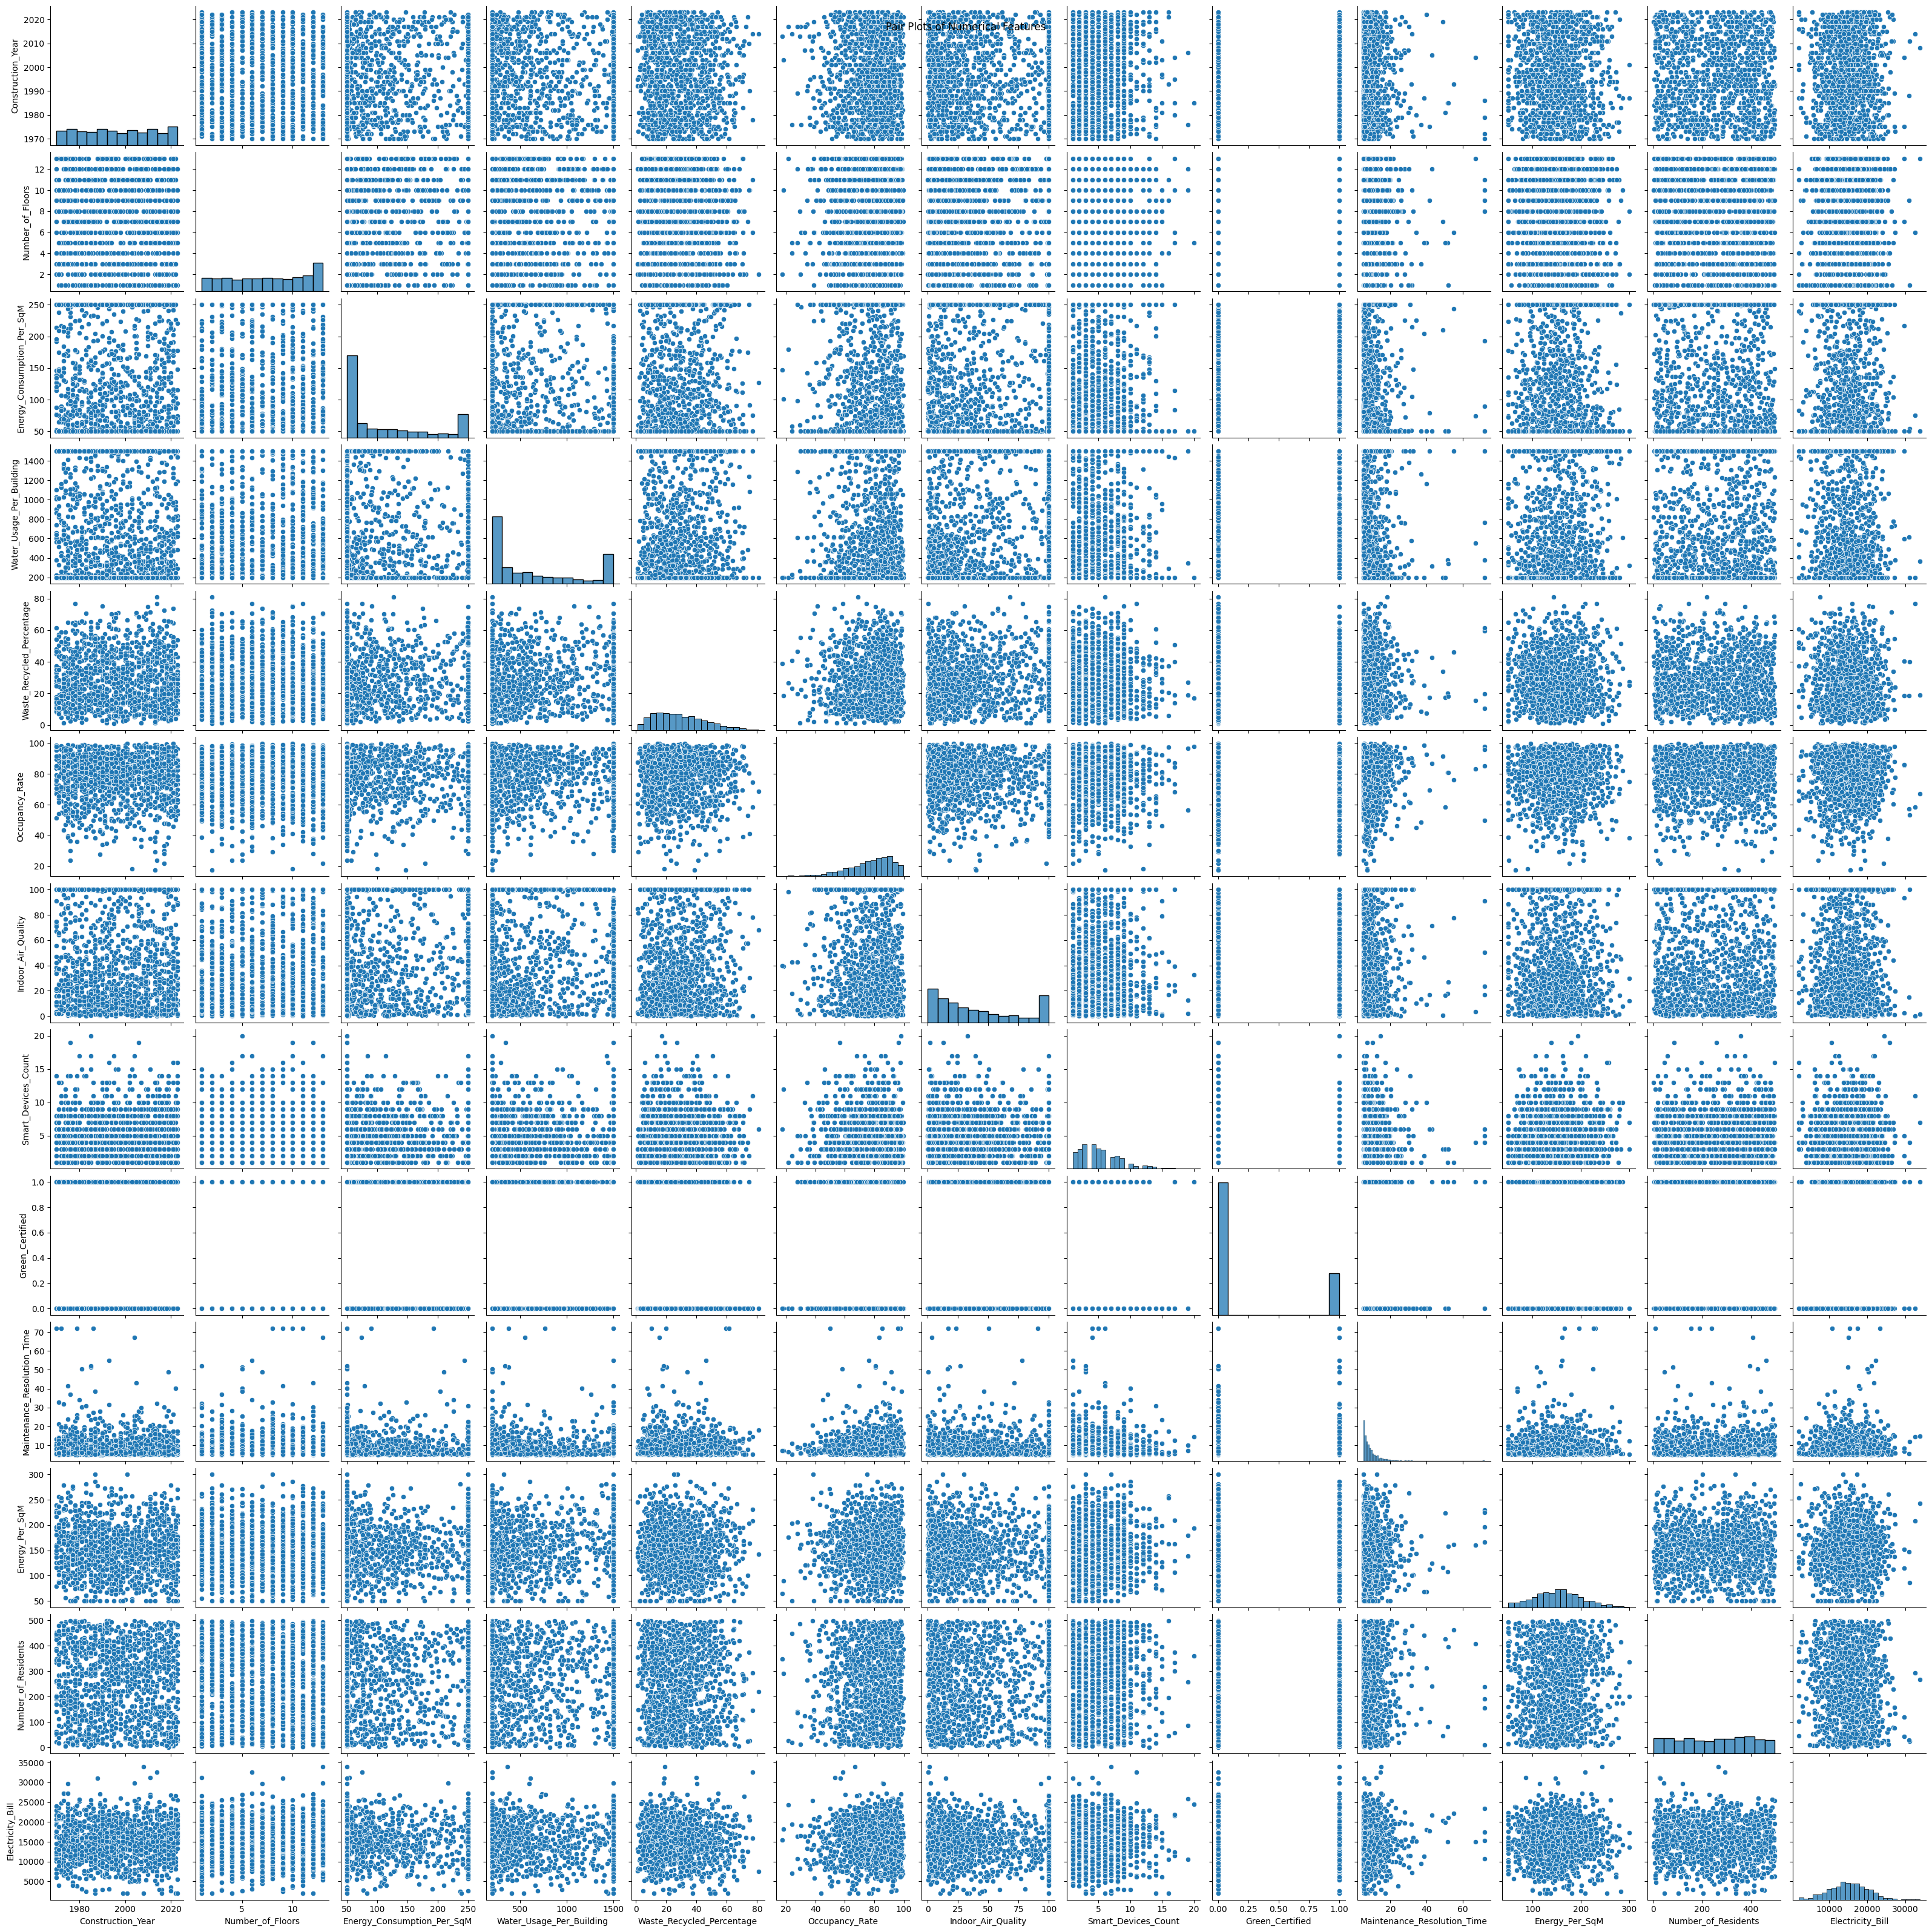

In [ ]:
'''

Pair plots : these are matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset
They automatically considers the numerical features from the data for the representation

'''
# Pair plots

plt.figure()
sns.pairplot(df)
plt.suptitle('Pair Plots of Numerical Features')
plt.show()

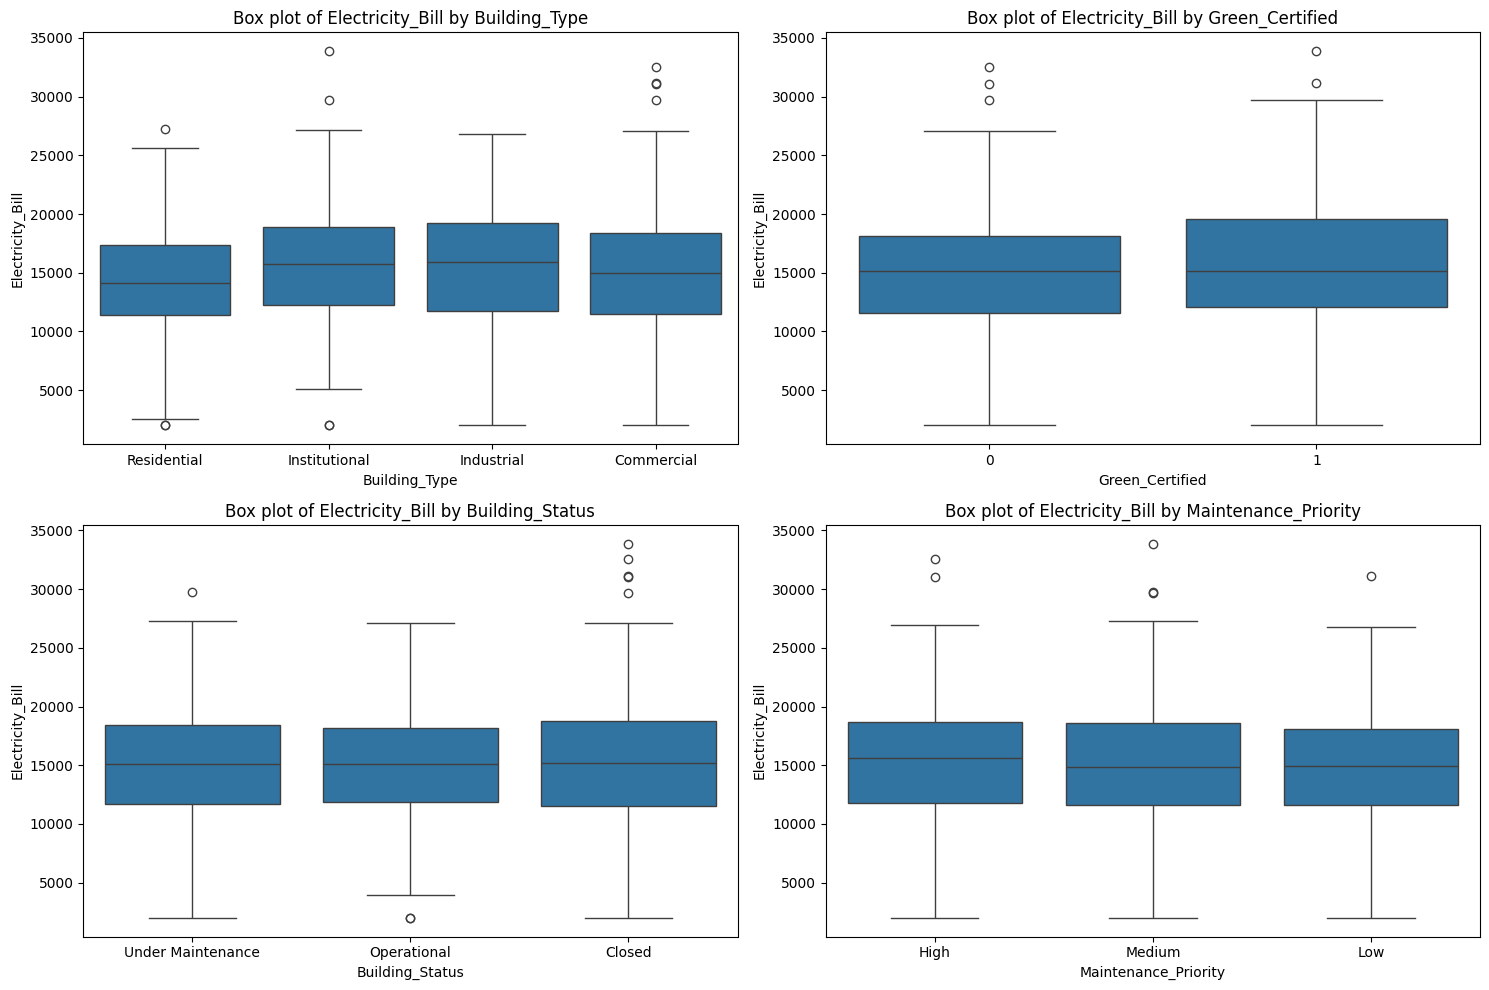

In [ ]:
'''
Boxplots and Violinplots are used to shown the distribution of categorical data.
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable
'''

# box plots
plt.figure(figsize=(15,10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=feature, y="Electricity_Bill")
    plt.title(f'Box plot of Electricity_Bill by {feature}')
plt.tight_layout()
plt.show()

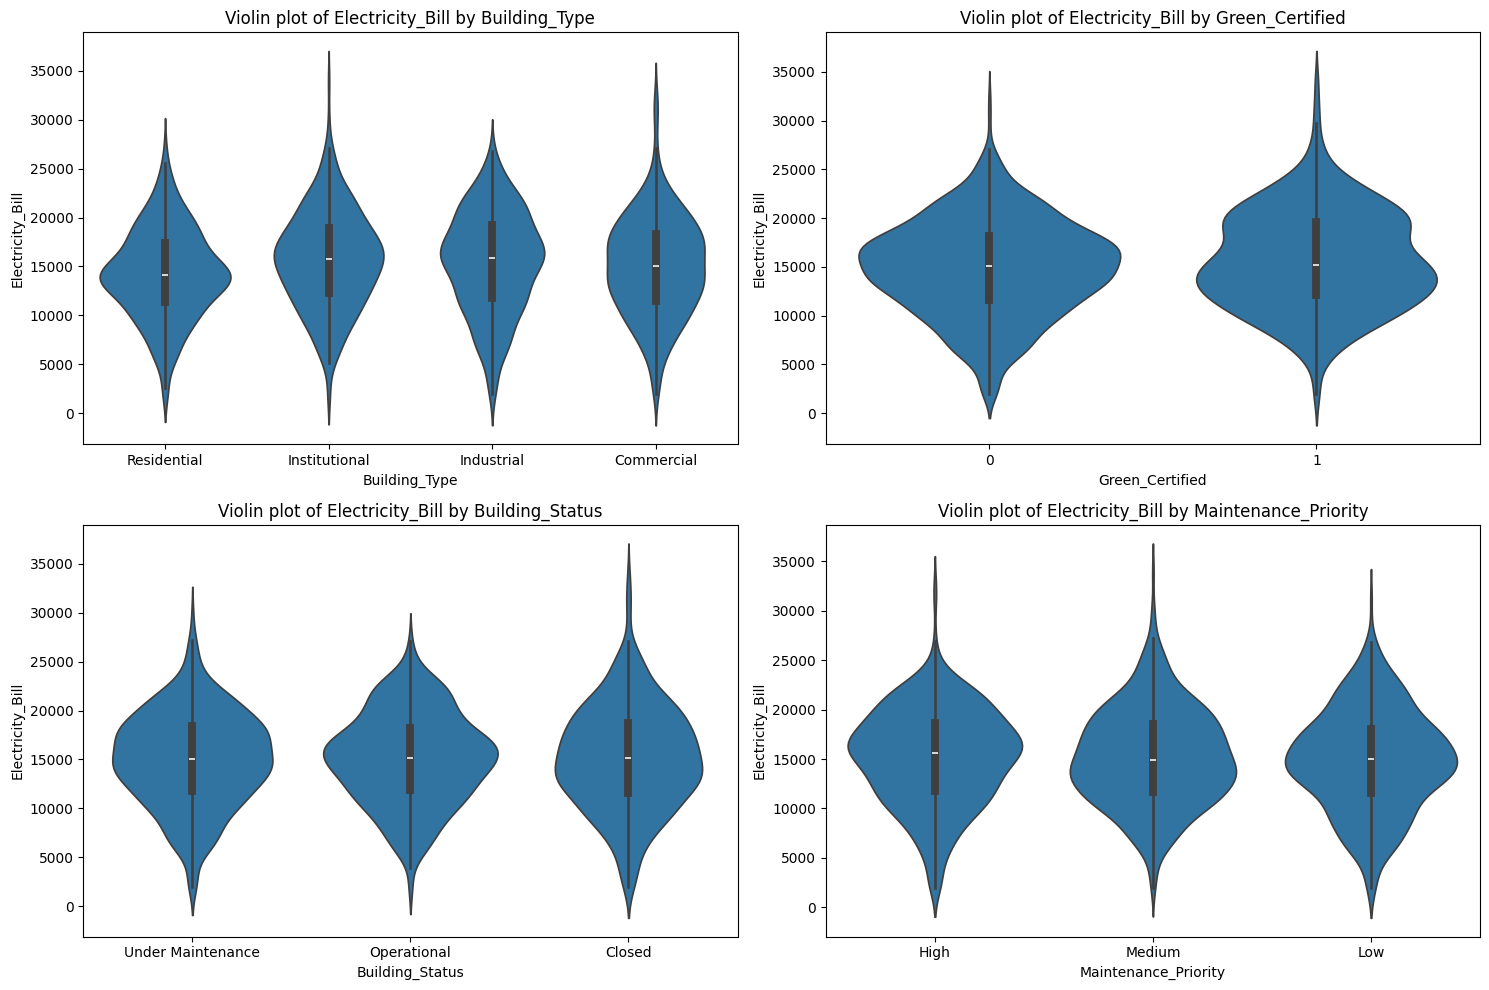

In [ ]:
'''
A violin plot plays a similar role as a box and whisker plot.
It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared
'''
# violin plots
plt.figure(figsize=(15,10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=df, x=feature, y="Electricity_Bill")
    plt.title(f'Violin plot of Electricity_Bill by {feature}')
plt.tight_layout()
plt.show()

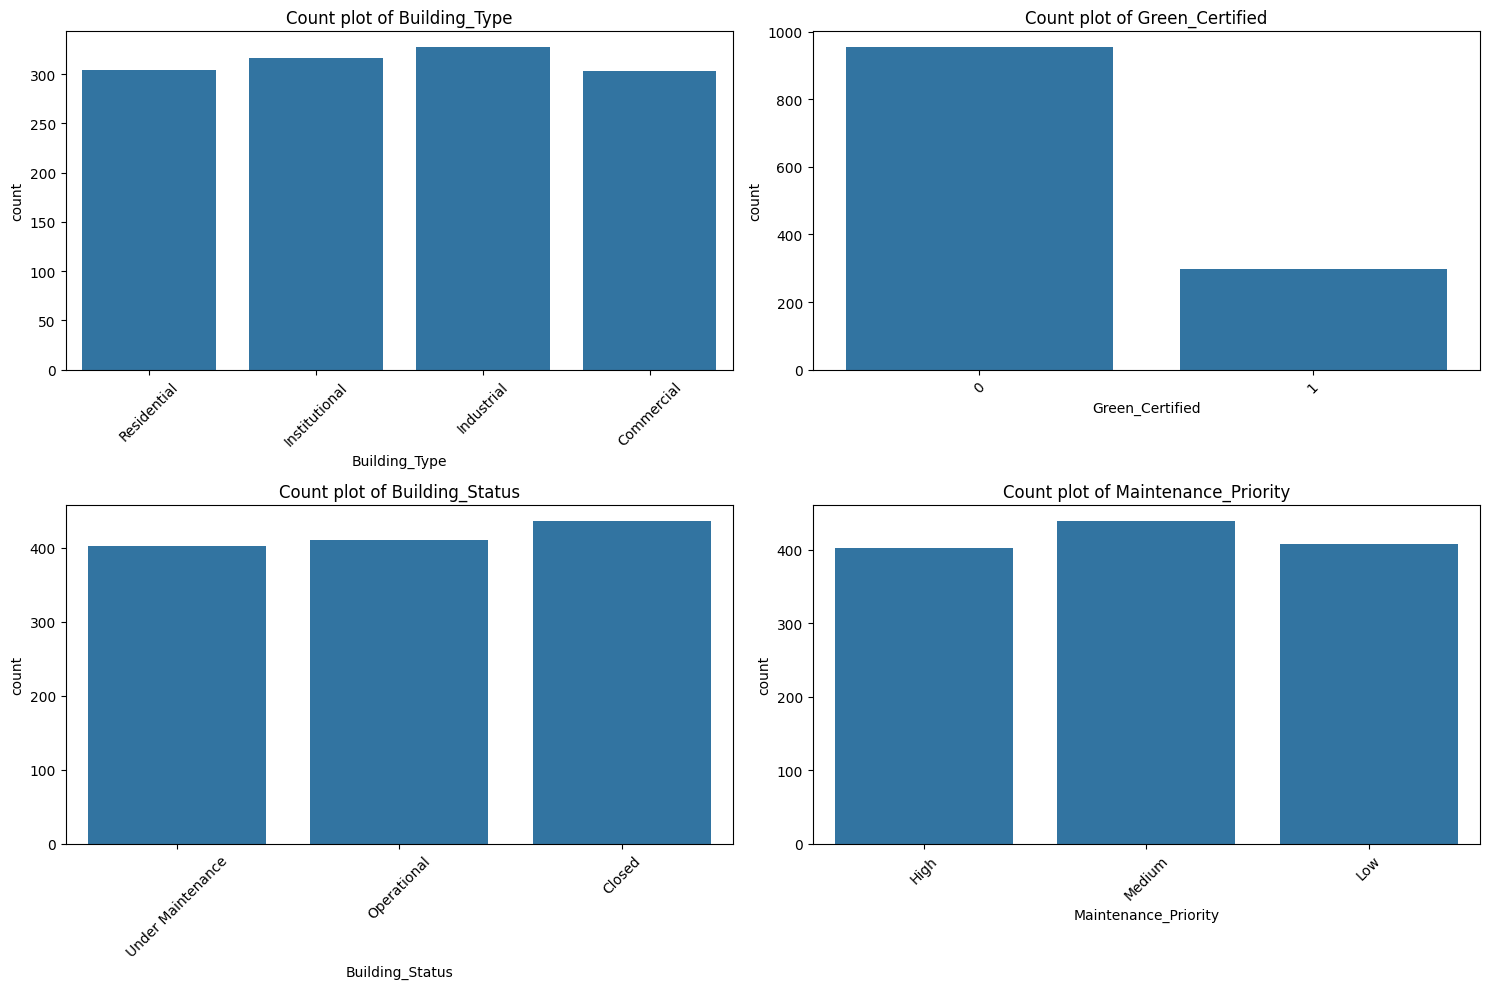

In [ ]:
'''
Count plots are similar to box plot , these are counting the occurances , used only for categorical data
'''

#count plots
plt.figure(figsize=(15,10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=feature)
    plt.title(f'Count plot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

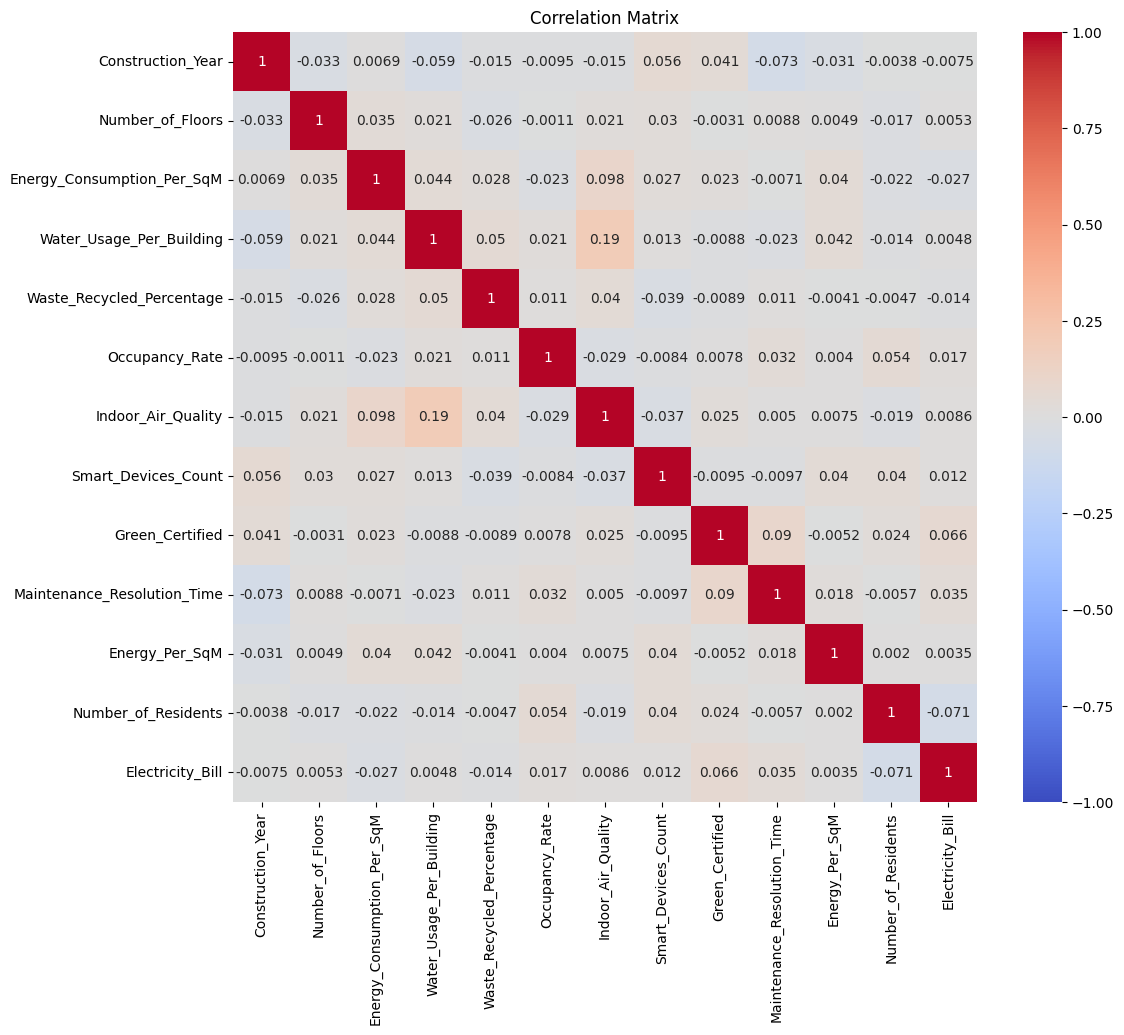

In [ ]:
'''
Correlation matrix : this represents the correlation among the features
'''

numeric_df = df.select_dtypes(include=[float, int])

#correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


#### Insights gained from the dataset :

1. All building types have almost similar median electricity bill as seen from the box plots.
2. Significant outliers can be seen in each data , for example : high number of outliers in closed building status.
3. Violin plots of the green certifications suggest that mostly the bills are concentarted for both towards the median.
4. Closed buildings generally have the smallest spread in electricity bills across the median, likely due to reduced energy usage but its unevenly spread across the electricity bills
5. Indoor air quality and water usage per building are 2 features more correlated than others according to the confusion matrix.  
6. The correlation matrix represents that electricity_bill is highly correlated with features such as Green Certified , Number of residents.


### Part B : Uniform Manifold Approximation and Projection (UMAP)


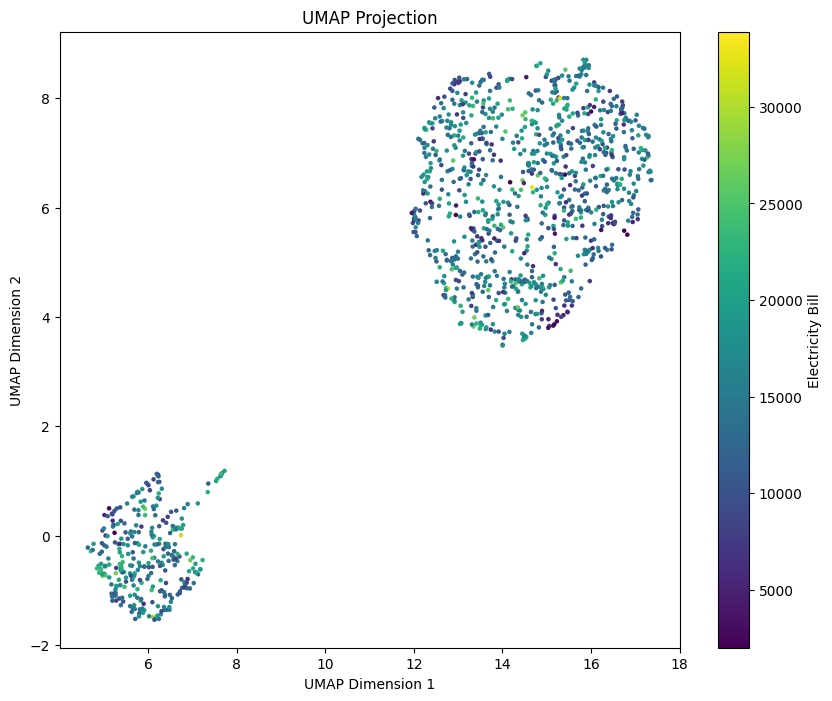

In [ ]:
numeric_df = df.select_dtypes(include=[float, int])

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(numeric_df)

# UMAP : taken from the reference stated above
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=df['Electricity_Bill'], cmap='viridis', s=5)
plt.colorbar(scatter, label='Electricity Bill')
plt.title('UMAP Projection')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

#### Insights gained :
The UMAP projection is separated into 2 distinct parts as seen from the UMAP.
It represents that the densities are not evenly distributed , there may be a bunch of outliers in the data which are located far from the density of the data.
The colors on the colorbar, represents the electricity bill and how it is distributed across the data.

### Part C

#### Data Preprocessing

In [10]:
'''
First encoding the categorical features , the checking of the null values have been done above
'''

cat_features = ["Building_Type","Building_Status","Maintenance_Priority"]
label_encoder = LabelEncoder()

for col in cat_features:
    features[col] = label_encoder.fit_transform(features[col])
    temp[col] = label_encoder.fit_transform(temp[col])


In [11]:
'''
Split the given dataset into 80:20 (train: test)
'''
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [12]:
X_trainh, X_testh, y_trainh, y_testh = train_test_split(features, target, test_size=0.2, random_state=42) # for part h

In [13]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, target, test_size=0.2, random_state=42) # for other parts

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2, random_state=42) # for other parts

In [15]:
X_train

Building_Type  Construction_Year  Number_of_Floors  \
1194              3               1994                12   
911               2               1984                13   
422               2               2005                 4   
670               3               1974                 1   
931               0               1984                11   
...             ...                ...               ...   
1044              0               2017                13   
1095              0               2013                 6   
1130              0               1986                11   
860               1               2015                 2   
1126              0               2011                 3   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
1194                   50.000000                580.606931   
911                    50.000000                970.030615   
422                    50.000000               1500.000000   
670                    50.000000               1189.472269   
931                   250.000000                239.075260   
...                          ...                       ...   
1044                  250.000000                200.000000   
1095                   50.000000               1104.346639   
1130                  192.788337               1500.000000   
860                   224.100389                200.000000   
1126                   50.000000                365.735148   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
1194                  43.094641       80.259802            6.102523   
911                   15.275873       60.502829            1.992007   
422                   36.814778       90.148878            8.790387   
670                   11.617533       74.123302           48.316881   
931                   15.539133       59.488492            8.189832   
...                         ...             ...                 ...   
1044                  16.889496       96.136080            1.632130   
1095                   5.401686       62.055646           48.852017   
1130                  19.730502       49.788178           50.534211   
860                   45.220014       95.966973           69.016964   
1126                  45.139665       76.479787           75.230346   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
1194                    5                0                     5.663658   
911                     3                0                     5.749664   
422                     7                1                     7.150327   
670                     3                1                    11.586360   
931                     7                1                     6.952755   
...                   ...              ...                          ...   
1044                    5                0                     8.499914   
1095                    4                0                    17.705763   
1130                    4                1                    72.000000   
860                     4                0                     8.081216   
1126                    1                1                     6.652251   

      Building_Status  Maintenance_Priority  Energy_Per_SqM  \
1194                1                     1       70.350313   
911                 1                     1      160.957516   
422                 2                     1      137.551793   
670                 2                     2      212.304260   
931                 2                     0      244.057853   
...               ...                   ...             ...   
1044                1                     2      141.368635   
1095                1                     1      145.964171   
1130                1                     0      166.067861   
860                 0                     0      160.146151   
1126                1                     2      165.131773   

      Number_of_Residents  
1

In [16]:
'''
Normalizing the data using the Standard Scaler
'''

scaler = StandardScaler()
numerical_cols = features.select_dtypes(include=[float, int]).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_train1[numerical_cols] = scaler.fit_transform(X_train1[numerical_cols])
X_test1[numerical_cols] = scaler.transform(X_test1[numerical_cols])
X_trainh[numerical_cols] = scaler.fit_transform(X_trainh[numerical_cols])
X_testh[numerical_cols] = scaler.transform(X_testh[numerical_cols])

In [17]:
X_train

Building_Type  Construction_Year  Number_of_Floors  \
1194       1.370953          -0.194382          1.300569   
911        0.468416          -0.830450          1.564216   
422        0.468416           0.505292         -0.808604   
670        1.370953          -1.466517         -1.599544   
931       -1.336656          -0.830450          1.036922   
...             ...                ...               ...   
1044      -1.336656           1.268573          1.564216   
1095      -1.336656           1.014146         -0.281311   
1130      -1.336656          -0.703236          1.036922   
860       -0.434120           1.141359         -1.335898   
1126      -1.336656           0.886932         -1.072251   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
1194                   -0.807078                 -0.121631   
911                    -0.807078                  0.685145   
422                    -0.807078                  1.783092   
670                    -0.807078                  1.139766   
931                     1.969636                 -0.829188   
...                          ...                       ...   
1044                    1.969636                 -0.910141   
1095                   -0.807078                  0.963410   
1130                    1.175334                  1.783092   
860                     1.610057                 -0.910141   
1126                   -0.807078                 -0.566785   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
1194                   0.839266        0.198607           -1.022175   
911                   -0.842379       -1.119436           -1.144787   
422                    0.459648        0.858335           -0.941999   
670                   -1.063526       -0.210776            0.237029   
931                   -0.826465       -1.187105           -0.959913   
...                         ...             ...                 ...   
1044                  -0.744836        1.257758           -1.155522   
1095                  -1.439274       -1.015843            0.252991   
1130                  -0.573097       -1.834240            0.303169   
860                    0.967745        1.246476            0.854487   
1126                   0.962888       -0.053568            1.039825   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
1194            -0.060540        -0.548079                    -0.556191   
911             -0.681461        -0.548079                    -0.544184   
422              0.560381         1.824556                    -0.348638   
670             -0.681461         1.824556                     0.270676   
931              0.560381         1.824556                    -0.376221   
...                   ...              ...                          ...   
1044            -0.060540        -0.548079                    -0.160222   
1095            -0.371000        -0.548079                     1.125005   
1130            -0.371000         1.824556                     8.705015   
860             -0.371000        -0.548079                    -0.218676   
1126            -1.302382         1.824556                    -0.418174   

      Building_Status  Maintenance_Priority  Energy_Per_SqM  \
1194         0.050190             -0.017106       -1.707263   
911          0.050190             -0.017106        0.187861   
422          1.274336             -0.017106       -0.301689   
670          1.274336              1.204767        1.261821   
931          1.274336             -1.238979        1.925974   
...               ...                   ...             ...   
1044         0.050190              1.204767       -0.221856   
1095         0.050190             -0.017106       -0.125737   
1130         0.050190             -1.238979        0.294749   
860         -1.173956             -1.238979        0.170891   
1126         0.050190              1.204767        0.275169   

      Number_of_Residents  
1

In [18]:
'''
Model Implementation
'''

linear_regression = LinearRegression()

In [19]:
'''
Storing the errors for the part c
'''

mse_train_a= []
mse_test_a = []
rmse_train_a = []
rmse_test_a = []
r2_train_a = []
r2_test_a = []
ar2_train_a = []
ar2_test_a = []
mae_train_a = []
mae_test_a = []

### Adjusted r2 score formula :

$${Adjusted\_R^2} = 1 - \left(1 - R^2\right) \times \frac{n - 1}{n - p - 1}$$

Where:
- \(R^2\) is the R-squared value,
- \(n\) is the sample size,
- \(p\) is the number of features.



In [20]:
linear_regression.fit(X_train, y_train)

''''
Evaluating the errors on training and testing data
'''

y_pred_train = linear_regression.predict(X_train)
print()
print("Training Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_train, y_pred_train))
mse_train_a.append(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
rmse_train_a.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R2 Score: ", r2_score(y_train, y_pred_train))
r2_train_a.append( r2_score(y_train, y_pred_train))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train, y_pred_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
ar2_train_a.append(1 - (1-r2_score(y_train, y_pred_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train, y_pred_train))
mae_train_a.append( mean_absolute_error(y_train, y_pred_train))

# Make predictions on the test data
y_pred = linear_regression.predict(X_test)

print()
print("Testing Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))
mse_test_a.append(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
rmse_test_a.append(np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))
r2_test_a.append(r2_score(y_test, y_pred))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
ar2_test_a.append(1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
mae_test_a.append(mean_absolute_error(y_test, y_pred))



Training Data Accuracy: 
Mean Squared Error (MSE):  24475013.16847547
Root Mean Squared Error (RMSE):  4947.222773281538
R2 Score:  0.013922520844610209
Adjusted R2 Score:  -0.0011091480449536562
Mean Absolute Error (MAE):  4006.32846932936

Testing Data Accuracy: 
Mean Squared Error (MSE):  24278016.155742623
Root Mean Squared Error (RMSE):  4927.272689403604
R2 Score:  3.7344733075372893e-05
Adjusted R2 Score:  -0.0640628254763429
Mean Absolute Error (MAE):  3842.4093125585155


### Part D : Recursive Feature Elimination (RFE) or Correlation analysis on the original dataset to select the 3 most important features.

In [21]:
temp

Building_Type  Construction_Year  Number_of_Floors  \
0                 3               1989                12   
1                 2               1980                 6   
2                 1               2006                10   
3                 0               1985                 1   
4                 1               2006                12   
...             ...                ...               ...   
1245              3               1985                10   
1246              0               2007                 5   
1247              0               1990                 1   
1248              2               2021                 6   
1249              3               2017                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      50.000000                477.681762   
1                     225.759107                200.000000   
2                      98.755927                200.000000   
3                      68.470692                200.000000   
4                      50.000000                347.093644   
...                          ...                       ...   
1245                  147.613313                677.914745   
1246                   50.000000                861.042961   
1247                   50.000000               1500.000000   
1248                  250.000000               1500.000000   
1249                  143.821153               1500.000000   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                     48.417266       81.814110           13.780635   
1                     46.405516       45.109000           10.177771   
2                     17.247585       48.526225           27.757026   
3                     57.719480       76.335921            1.519812   
4                     26.936862       96.511319            1.874753   
...                         ...             ...                 ...   
1245                  29.602927       84.905237           51.340186   
1246                  23.576263       97.506525          100.000000   
1247                  46.190167       94.054395           13.554989   
1248                  55.807260       67.780207           13.554989   
1249                  13.855410       77.499626           13.554989   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                       6                0                     7.211768   
1                      10                0                    34.139492   
2                       2                1                     6.224612   
3                       2                0                     5.327398   
4                      19                0                     7.060854   
...                   ...              ...                          ...   
1245                    9                0                     8.304416   
1246                    5                0                     5.810473   
1247                    1                0                     6.761967   
1248                    6                0                    14.147058   
1249                    2                1                     5.844906   

      Building_Status  Maintenance_Priority  Energy_Per_SqM  \
0                   2                     0      174.835708   
1                   2                     0      143.086785   
2                   1                     2      182.384427   
3                   0                     1      226.151493   
4                   0                     2      138.292331   
...               ...                   ...             ...   
1245                1                     1       88.802987   
1246                0                     1      151.704173   
1247                2                     2      111.501338   
1248                1                     2      161.689296   
1249                2                     1       72.205218   

      Number_of_Residents  El

### Doing Correlation analysis

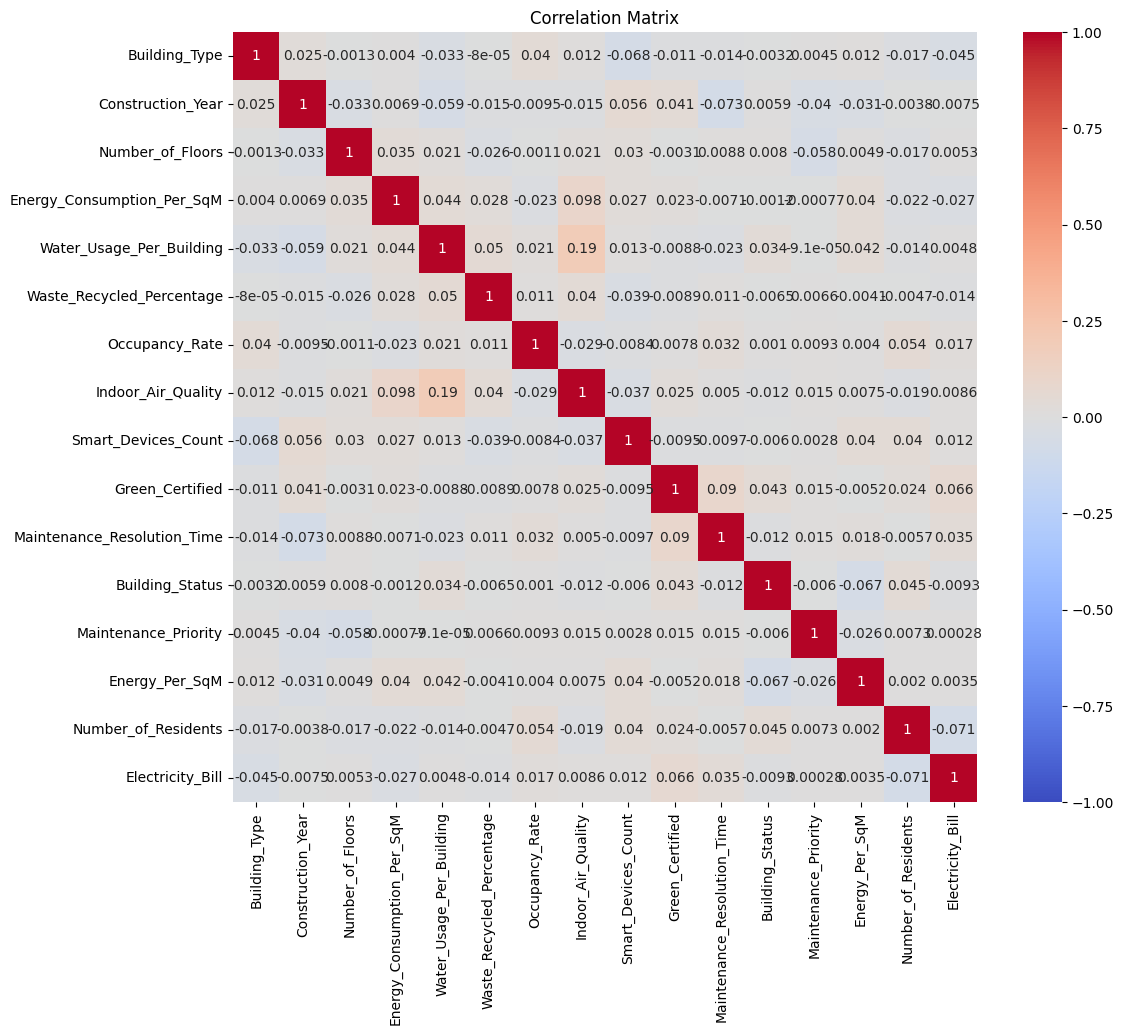

In [22]:
correlation_matrix = temp.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## The top3 features according to this are : Building_type , Green_certified and **Number_of_Residents**

In [23]:
from sklearn.feature_selection import RFE

In [24]:
'''
Performing RFE
'''

rfe = RFE(estimator=linear_regression, n_features_to_select=3)
rfe.fit(X_train1, y_train1)


selected_features = X_train.columns[rfe.support_]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')


In [25]:
mse_train_d= []
mse_test_d = []
rmse_train_d = []
rmse_test_d = []
r2_train_d = []
r2_test_d = []
ar2_train_d = []
ar2_test_d = []
mae_train_d = []
mae_test_d = []

In [26]:
'''
Evaluation done with top 3 features
'''
# Training the model using only the selected features
X_train_selected = X_train1[selected_features]
X_test_selected = X_test1[selected_features]


linear_regression.fit(X_train_selected, y_train1)

# Predict on train and test data
y_train3 = linear_regression.predict(X_train_selected)
y_test3 = linear_regression.predict(X_test_selected)

print()
print("Training Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_train1, y_train3))
mse_train_d.append(mean_squared_error(y_train1, y_train3))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train1, y_train3)))
rmse_train_d.append(np.sqrt(mean_squared_error(y_train1, y_train3)))
print("R2 Score: ", r2_score(y_train1, y_train3))
r2_train_d.append( r2_score(y_train1, y_train3))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train1, y_train3))*(len(y_train1)-1)/(len(y_train1)-X_train1.shape[1]-1))
ar2_train_d.append(1 - (1-r2_score(y_train, y_train3))*(len(y_train1)-1)/(len(y_train1)-X_train1.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train1, y_train3))
mae_train_d.append( mean_absolute_error(y_train1, y_train3))

print()
print("Testing Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_test1, y_test3))
mse_test_d.append(mean_squared_error(y_test1, y_test3))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test1, y_test3)))
rmse_test_d.append(np.sqrt(mean_squared_error(y_test1, y_test3)))
print("R2 Score: ", r2_score(y_test1, y_test3))
r2_test_d.append( r2_score(y_test1, y_test3))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test1, y_test3))*(len(y_test1)-1)/(len(y_test1)-X_test1.shape[1]-1))
ar2_test_d.append(1 - (1-r2_score(y_test1, y_test3))*(len(y_test1)-1)/(len(y_test1)-X_test1.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test1, y_test3))
mae_test_d.append(mean_absolute_error(y_test1, y_test3))


Training Data Accuracy: 
Mean Squared Error (MSE):  24569032.90689799
Root Mean Squared Error (RMSE):  4956.715939702212
R2 Score:  0.010134545491283897
Adjusted R2 Score:  -0.004954866925007462
Mean Absolute Error (MAE):  4006.4733775147365

Testing Data Accuracy: 
Mean Squared Error (MSE):  23941409.062998377
Root Mean Squared Error (RMSE):  4892.995918964002
R2 Score:  0.01390151386794114
Adjusted R2 Score:  -0.049309927550780674
Mean Absolute Error (MAE):  3813.948128176773


#### Graphical analysis

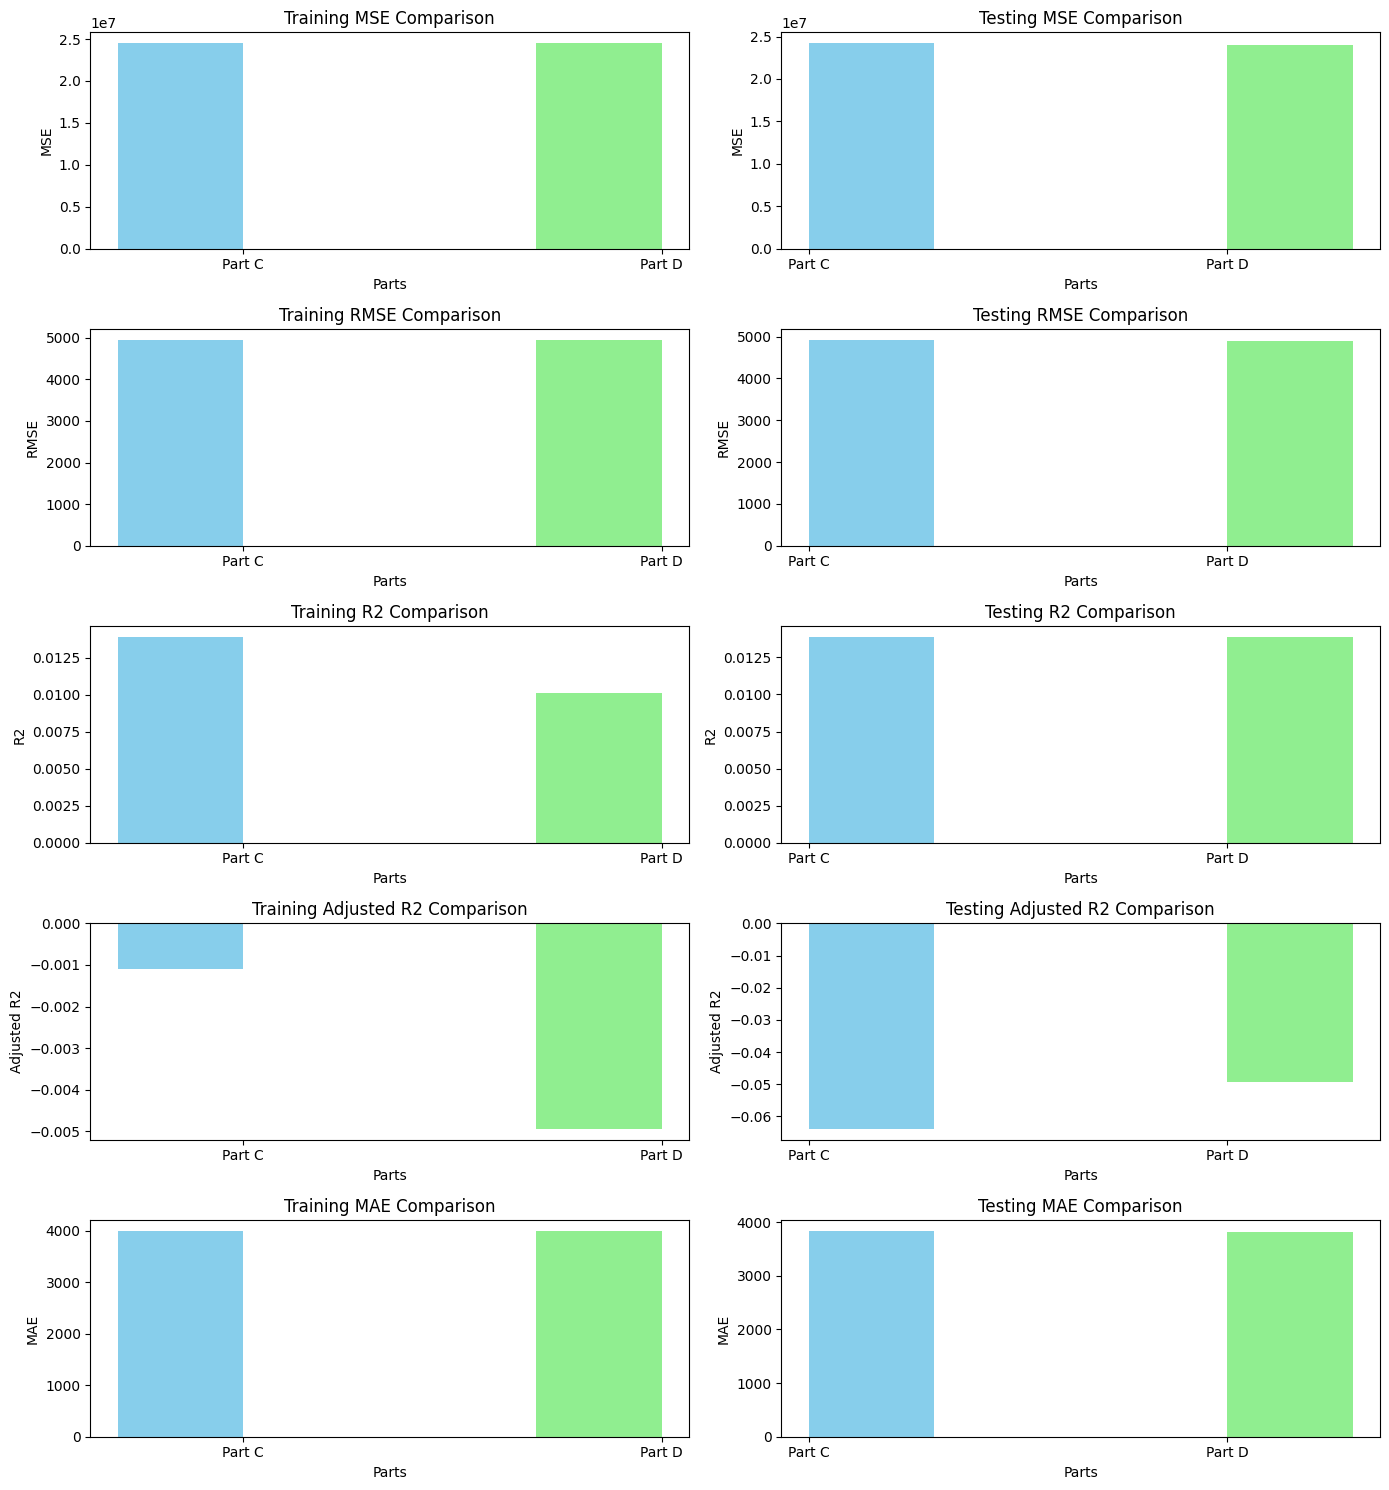

In [27]:
metrics = {
    'MSE': ([mse_train_a[0], mse_train_d[0]], [mse_test_a[0], mse_test_d[0]]),
    'RMSE': ([rmse_train_a[0], rmse_train_d[0]], [rmse_test_a[0], rmse_test_d[0]]),
    'R2': ([r2_train_a[0], r2_train_d[0]], [r2_test_d[0], r2_test_d[0]]),
    'Adjusted R2': ([ar2_train_a[0], ar2_train_d[0]], [ar2_test_a[0], ar2_test_d[0]]),
    'MAE': ([mae_train_a[0], mae_train_d[0]], [mae_test_a[0], mae_test_d[0]])
}

categories = ['Part C', 'Part D']
bar_width = 0.3
bar_positions = np.arange(len(categories))

fig, axes = plt.subplots(5, 2, figsize=(14, 15))

for i, (metric, (train_values, test_values)) in enumerate(metrics.items()):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]

    ax1.bar(bar_positions - bar_width / 2, train_values, color=['skyblue', 'lightgreen'], width=bar_width)
    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels(categories)
    ax1.set_xlabel('Parts')
    ax1.set_ylabel(metric)
    ax1.set_title(f'Training {metric} Comparison')


    ax2.bar(bar_positions + bar_width / 2, test_values, color=['skyblue', 'lightgreen'], width=bar_width)
    ax2.set_xticks(bar_positions)
    ax2.set_xticklabels(categories)
    ax2.set_xlabel('Parts')
    ax2.set_ylabel(metric)
    ax2.set_title(f'Testing {metric} Comparison')


plt.tight_layout()
plt.show()

### Part E

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
temp2

Building_Type  Construction_Year  Number_of_Floors  \
0                 3               1989                12   
1                 2               1980                 6   
2                 1               2006                10   
3                 0               1985                 1   
4                 1               2006                12   
...             ...                ...               ...   
1245              3               1985                10   
1246              0               2007                 5   
1247              0               1990                 1   
1248              2               2021                 6   
1249              3               2017                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      50.000000                477.681762   
1                     225.759107                200.000000   
2                      98.755927                200.000000   
3                      68.470692                200.000000   
4                      50.000000                347.093644   
...                          ...                       ...   
1245                  147.613313                677.914745   
1246                   50.000000                861.042961   
1247                   50.000000               1500.000000   
1248                  250.000000               1500.000000   
1249                  143.821153               1500.000000   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                     48.417266       81.814110           13.780635   
1                     46.405516       45.109000           10.177771   
2                     17.247585       48.526225           27.757026   
3                     57.719480       76.335921            1.519812   
4                     26.936862       96.511319            1.874753   
...                         ...             ...                 ...   
1245                  29.602927       84.905237           51.340186   
1246                  23.576263       97.506525          100.000000   
1247                  46.190167       94.054395           13.554989   
1248                  55.807260       67.780207           13.554989   
1249                  13.855410       77.499626           13.554989   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                       6                0                     7.211768   
1                      10                0                    34.139492   
2                       2                1                     6.224612   
3                       2                0                     5.327398   
4                      19                0                     7.060854   
...                   ...              ...                          ...   
1245                    9                0                     8.304416   
1246                    5                0                     5.810473   
1247                    1                0                     6.761967   
1248                    6                0                    14.147058   
1249                    2                1                     5.844906   

      Building_Status  Maintenance_Priority  Energy_Per_SqM  \
0                   2                     0      174.835708   
1                   2                     0      143.086785   
2                   1                     2      182.384427   
3                   0                     1      226.151493   
4                   0                     2      138.292331   
...               ...                   ...             ...   
1245                1                     1       88.802987   
1246                0                     1      151.704173   
1247                2                     2      111.501338   
1248                1                     2      161.689296   
1249                2                     1       72.205218   

      Number_of_Residents  El

In [30]:
features2

Building_Type  Construction_Year  Number_of_Floors  \
0       Residential               1989                12   
1     Institutional               1980                 6   
2        Industrial               2006                10   
3        Commercial               1985                 1   
4        Industrial               2006                12   
...             ...                ...               ...   
1245    Residential               1985                10   
1246     Commercial               2007                 5   
1247     Commercial               1990                 1   
1248  Institutional               2021                 6   
1249    Residential               2017                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      50.000000                477.681762   
1                     225.759107                200.000000   
2                      98.755927                200.000000   
3                      68.470692                200.000000   
4                      50.000000                347.093644   
...                          ...                       ...   
1245                  147.613313                677.914745   
1246                   50.000000                861.042961   
1247                   50.000000               1500.000000   
1248                  250.000000               1500.000000   
1249                  143.821153               1500.000000   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                     48.417266       81.814110           13.780635   
1                     46.405516       45.109000           10.177771   
2                     17.247585       48.526225           27.757026   
3                     57.719480       76.335921            1.519812   
4                     26.936862       96.511319            1.874753   
...                         ...             ...                 ...   
1245                  29.602927       84.905237           51.340186   
1246                  23.576263       97.506525          100.000000   
1247                  46.190167       94.054395           13.554989   
1248                  55.807260       67.780207           13.554989   
1249                  13.855410       77.499626           13.554989   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                       6                0                     7.211768   
1                      10                0                    34.139492   
2                       2                1                     6.224612   
3                       2                0                     5.327398   
4                      19                0                     7.060854   
...                   ...              ...                          ...   
1245                    9                0                     8.304416   
1246                    5                0                     5.810473   
1247                    1                0                     6.761967   
1248                    6                0                    14.147058   
1249                    2                1                     5.844906   

        Building_Status Maintenance_Priority  Energy_Per_SqM  \
0     Under Maintenance                 High      174.835708   
1     Under Maintenance                 High      143.086785   
2           Operational               Medium      182.384427   
3                Closed                  Low      226.151493   
4                Closed               Medium      138.292331   
...                 ...                  ...             ...   
1245        Operational                  Low       88.802987   
1246             Closed                  Low      151.704173   
1247  Under Maintenance               Medium      111.501338   
1248        Operational               Medium      161.689296   
1249  Under Maintenance                  Low       72.205218   

      Number_of_R

### Fixing Errors encountered during One-Hot encoding and important observations :
pandas.pydata.org/docs/user_guide/indexing.html

www.geeksforgeeks.org/select-rows-columns-by-name-or-index-in-pandas-dataframe-using-loc-iloc/
stackoverflow.com/questions/46221280/

index-objects-in-pandas-why-pd-columns-returns-index-rather-than-list

stackoverflow.com/questions/58525878/

pandas-select-a-value-in-a-specific-column-based-on-the-index-label
note.nkmk.me/en/python-pandas-index-row-column/

**Imp** : https://stackoverflow.com/questions/47786637/how-to-handle-category-mismatch-after-onehotencoding-from-test-data-while-predic



In [31]:
'''
First the data is split into training and testing data and then training and testing data are encoded separately , further scaling of the features is done
'''

cat_features = ["Building_Type","Building_Status","Maintenance_Priority"]
num_features = temp2.drop(columns=cat_features + ['Electricity_Bill']).columns

onehotencoder=OneHotEncoder()

enc_data=onehotencoder.fit(features2[cat_features])

X_traind, X_testd, y_traind, y_testd = train_test_split(features2, target2, test_size=0.2, random_state=42)

enc_data_train= pd.DataFrame(onehotencoder.transform(X_traind[cat_features]).toarray())

X_traind = X_traind[num_features].reset_index(drop=True).join(enc_data_train) # Reseting index of X_train3

enc_data_test=pd.DataFrame(onehotencoder.transform(X_testd[cat_features]).toarray())

X_testd = X_testd[num_features].reset_index(drop=True).join(enc_data_test) # Reseting index of X_test3

# X_train3=X_train3[num_features].join(enc_data_train)
# enc_data_test=pd.DataFrame(onehotencoder.transform(X_test3[cat_features]).toarray())
# X_test3=X_test3[num_features].join(enc_data_test)


In [32]:
X_traind

Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0                 1994                12                   50.000000   
1                 1984                13                   50.000000   
2                 2005                 4                   50.000000   
3                 1974                 1                   50.000000   
4                 1984                11                  250.000000   
..                 ...               ...                         ...   
995               2017                13                  250.000000   
996               2013                 6                   50.000000   
997               1986                11                  192.788337   
998               2015                 2                  224.100389   
999               2011                 3                   50.000000   

     Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                  580.606931                  43.094641       80.259802   
1                  970.030615                  15.275873       60.502829   
2                 1500.000000                  36.814778       90.148878   
3                 1189.472269                  11.617533       74.123302   
4                  239.075260                  15.539133       59.488492   
..                        ...                        ...             ...   
995                200.000000                  16.889496       96.136080   
996               1104.346639                   5.401686       62.055646   
997               1500.000000                  19.730502       49.788178   
998                200.000000                  45.220014       95.966973   
999                365.735148                  45.139665       76.479787   

     Indoor_Air_Quality  Smart_Devices_Count  Green_Certified  \
0              6.102523                    5                0   
1              1.992007                    3                0   
2              8.790387                    7                1   
3             48.316881                    3                1   
4              8.189832                    7                1   
..                  ...                  ...              ...   
995            1.632130                    5                0   
996           48.852017                    4                0   
997           50.534211                    4                1   
998           69.016964                    4                0   
999           75.230346                    1                1   

     Maintenance_Resolution_Time  ...    0    1    2    3    4    5    6    7  \
0                       5.663658  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
1                       5.749664  ...  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
2                       7.150327  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
3                      11.586360  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4                       6.952755  ...  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
..                           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995                     8.499914  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
996                    17.705763  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
997                    72.000000  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
998                     8.081216  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
999                     6.652251  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

       8    9  
0    1.0  0.0  
1    1.0  0.0  
2    1.0  0.0  
3    0.0  1.0  
4    0.0  0.0  
..   ...  ...  
995  0.0  1.0  
996  1.0  0.0  
997  0.0  0.0  
998  0.0  0.0  
999  0.0  1.0  

[1000 rows x 22 columns]

In [33]:
scaler = StandardScaler()
X_traind[num_features] = scaler.fit_transform(X_traind[num_features])
X_testd[num_features] = scaler.transform(X_testd[num_features])


In [34]:
X_traind

Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0            -0.194382          1.300569                   -0.807078   
1            -0.830450          1.564216                   -0.807078   
2             0.505292         -0.808604                   -0.807078   
3            -1.466517         -1.599544                   -0.807078   
4            -0.830450          1.036922                    1.969636   
..                 ...               ...                         ...   
995           1.268573          1.564216                    1.969636   
996           1.014146         -0.281311                   -0.807078   
997          -0.703236          1.036922                    1.175334   
998           1.141359         -1.335898                    1.610057   
999           0.886932         -1.072251                   -0.807078   

     Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                   -0.121631                   0.839266        0.198607   
1                    0.685145                  -0.842379       -1.119436   
2                    1.783092                   0.459648        0.858335   
3                    1.139766                  -1.063526       -0.210776   
4                   -0.829188                  -0.826465       -1.187105   
..                        ...                        ...             ...   
995                 -0.910141                  -0.744836        1.257758   
996                  0.963410                  -1.439274       -1.015843   
997                  1.783092                  -0.573097       -1.834240   
998                 -0.910141                   0.967745        1.246476   
999                 -0.566785                   0.962888       -0.053568   

     Indoor_Air_Quality  Smart_Devices_Count  Green_Certified  \
0             -1.022175            -0.060540        -0.548079   
1             -1.144787            -0.681461        -0.548079   
2             -0.941999             0.560381         1.824556   
3              0.237029            -0.681461         1.824556   
4             -0.959913             0.560381         1.824556   
..                  ...                  ...              ...   
995           -1.155522            -0.060540        -0.548079   
996            0.252991            -0.371000        -0.548079   
997            0.303169            -0.371000         1.824556   
998            0.854487            -0.371000        -0.548079   
999            1.039825            -1.302382         1.824556   

     Maintenance_Resolution_Time  ...    0    1    2    3    4    5    6    7  \
0                      -0.556191  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
1                      -0.544184  ...  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
2                      -0.348638  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
3                       0.270676  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4                      -0.376221  ...  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
..                           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995                    -0.160222  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
996                     1.125005  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
997                     8.705015  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
998                    -0.218676  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
999                    -0.418174  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

       8    9  
0    1.0  0.0  
1    1.0  0.0  
2    1.0  0.0  
3    0.0  1.0  
4    0.0  0.0  
..   ...  ...  
995  0.0  1.0  
996  1.0  0.0  
997  0.0  0.0  
998  0.0  0.0  
999  0.0  1.0  

[1000 rows x 22 columns]

In [35]:
mse_train_e = []
mse_test_e = []
rmse_train_e = []
rmse_test_e = []
r2_train_e = []
r2_test_e = []
ar2_train_e = []
ar2_test_e = []
mae_train_e = []
mae_test_e = []

In [36]:
'''
Implementing Ridge regression on the preprocessed data
'''
X_traind.columns = X_traind.columns.astype(str)
X_testd.columns = X_testd.columns.astype(str)
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_traind, y_traind)

# Predict on train and test data
y_train4 = ridge.predict(X_traind)
y_test4 = ridge.predict(X_testd)

print()
print("Training Data Accuracy: ")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_traind, y_train4))
mse_train_e.append(mean_squared_error(y_traind, y_train4))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_traind, y_train4)))
rmse_train_e.append(np.sqrt(mean_squared_error(y_traind, y_train4)))
print("R2 Score: ", r2_score(y_traind, y_train4))
r2_train_e.append(r2_score(y_traind, y_train4))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_traind, y_train4))*(len(y_traind)-1)/(len(y_traind)-X_traind.shape[1]-1))
ar2_train_e.append(1 - (1-r2_score(y_traind, y_train4))*(len(y_traind)-1)/(len(y_traind)-X_traind.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_traind, y_train4))
mae_train_e.append(mean_absolute_error(y_traind, y_train4))

print()
print("Testing Data Accuracy: ")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_testd, y_test4))
mse_test_e.append( mean_squared_error(y_testd, y_test4))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_testd, y_test4)))
rmse_test_e.append(np.sqrt(mean_squared_error(y_testd, y_test4)))
print("R2 Score: ", r2_score(y_testd, y_test4))
r2_test_e.append(r2_score(y_testd, y_test4))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_testd, y_test4))*(len(y_testd)-1)/(len(y_testd)-X_testd.shape[1]-1))
ar2_test_e.append( 1 - (1-r2_score(y_testd, y_test4))*(len(y_testd)-1)/(len(y_testd)-X_testd.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_testd, y_test4))
mae_test_e.append(mean_absolute_error(y_testd, y_test4))


Training Data Accuracy: 
Mean Squared Error (MSE):  24188931.12871915
Root Mean Squared Error (RMSE):  4918.224387796794
R2 Score:  0.025448523084228958
Adjusted R2 Score:  0.003503658711509483
Mean Absolute Error (MAE):  3976.718619750425

Testing Data Accuracy: 
Mean Squared Error (MSE):  24129092.811629098
Root Mean Squared Error (RMSE):  4912.1372956819005
R2 Score:  0.006171197748729096
Adjusted R2 Score:  -0.09014701216108567
Mean Absolute Error (MAE):  3797.50796864784


### Graphical analysis

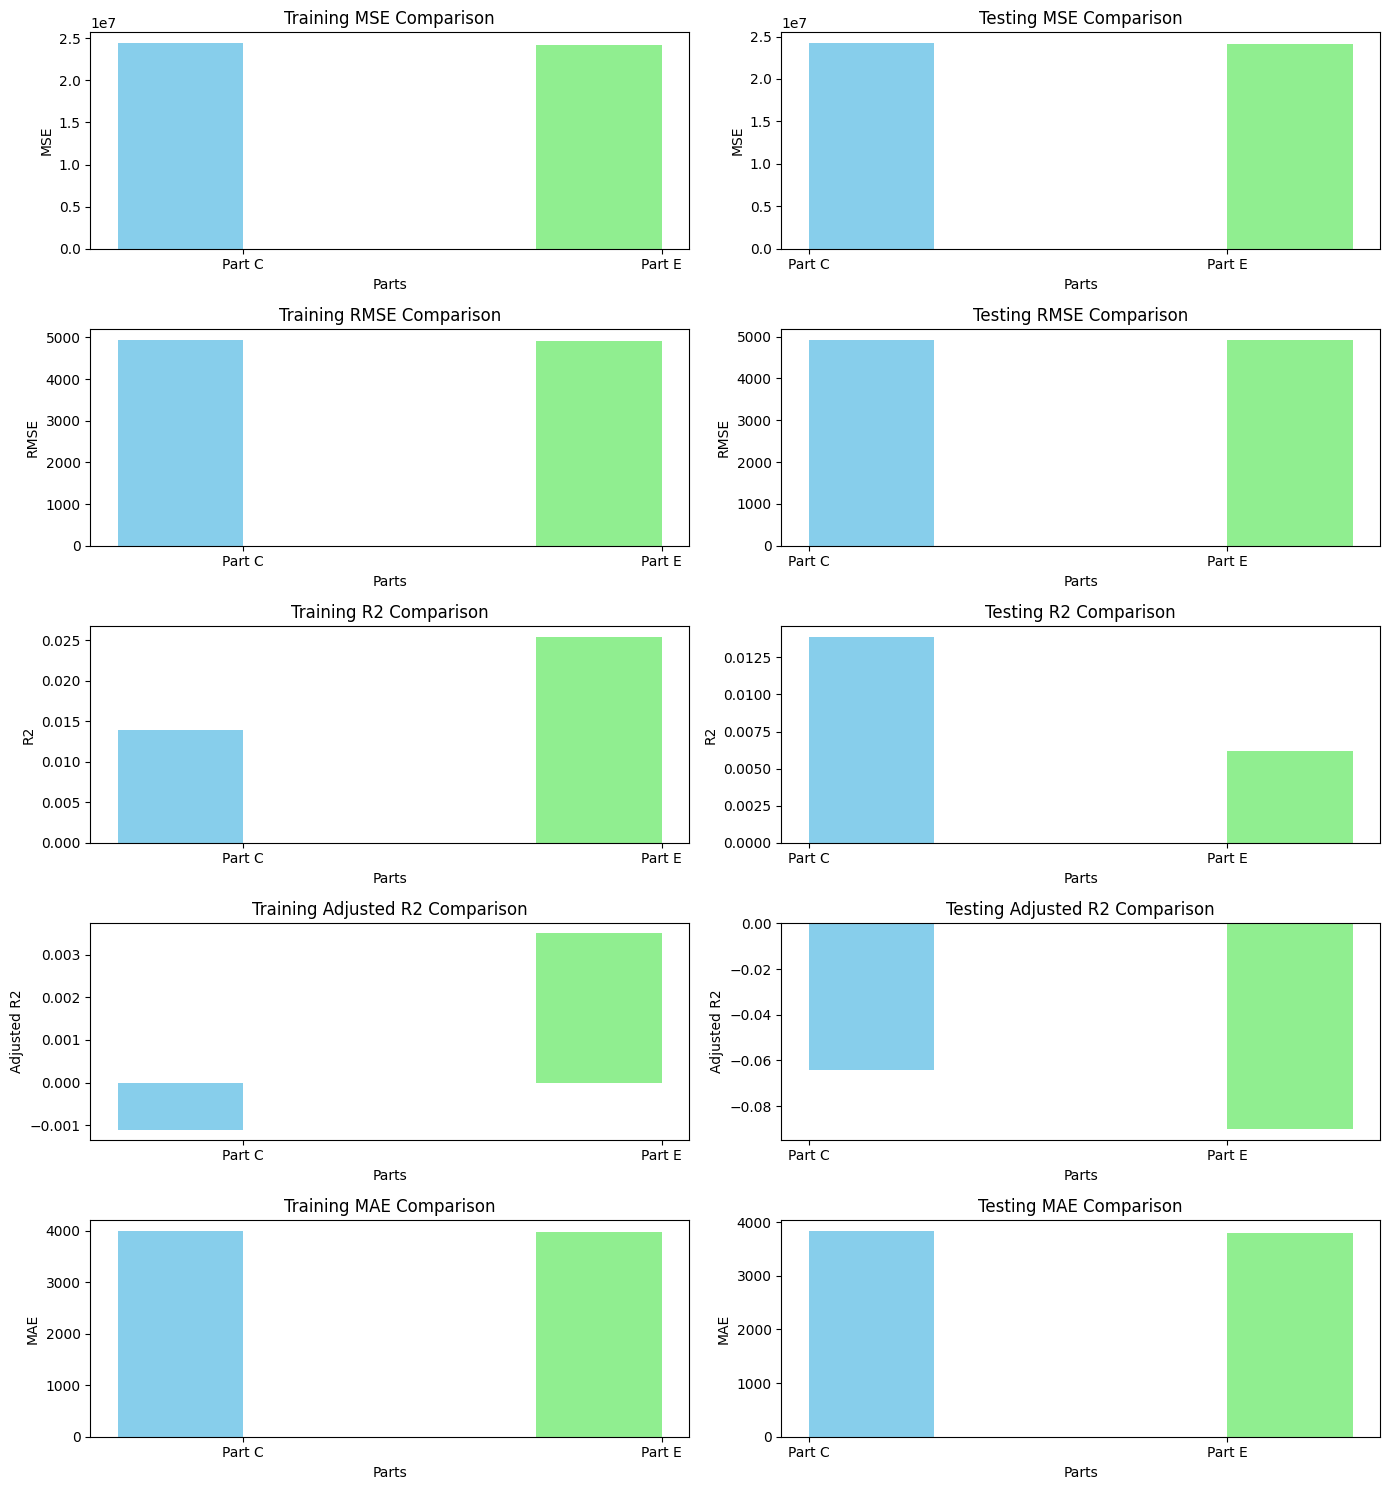

In [37]:
metrics = {
    'MSE': ([mse_train_a[0], mse_train_e[0]], [mse_test_a[0], mse_test_e[0]]),
    'RMSE': ([rmse_train_a[0], rmse_train_e[0]], [rmse_test_a[0], rmse_test_e[0]]),
    'R2': ([r2_train_a[0], r2_train_e[0]], [r2_test_d[0], r2_test_e[0]]),
    'Adjusted R2': ([ar2_train_a[0], ar2_train_e[0]], [ar2_test_a[0], ar2_test_e[0]]),
    'MAE': ([mae_train_a[0], mae_train_e[0]], [mae_test_a[0], mae_test_e[0]])
}

categories = ['Part C', 'Part E']
bar_width = 0.3
bar_positions = np.arange(len(categories))

fig, axes = plt.subplots(5, 2, figsize=(14, 15))

for i, (metric, (train_values, test_values)) in enumerate(metrics.items()):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]

    ax1.bar(bar_positions - bar_width / 2, train_values, color=['skyblue', 'lightgreen'], width=bar_width)
    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels(categories)
    ax1.set_xlabel('Parts')
    ax1.set_ylabel(metric)
    ax1.set_title(f'Training {metric} Comparison')


    ax2.bar(bar_positions + bar_width / 2, test_values, color=['skyblue', 'lightgreen'], width=bar_width)
    ax2.set_xticks(bar_positions)
    ax2.set_xticklabels(categories)
    ax2.set_xlabel('Parts')
    ax2.set_ylabel(metric)
    ax2.set_title(f'Testing {metric} Comparison')


plt.tight_layout()
plt.show()

### Part F

In [38]:
features_ica

Building_Type  Construction_Year  Number_of_Floors  \
0       Residential               1989                12   
1     Institutional               1980                 6   
2        Industrial               2006                10   
3        Commercial               1985                 1   
4        Industrial               2006                12   
...             ...                ...               ...   
1245    Residential               1985                10   
1246     Commercial               2007                 5   
1247     Commercial               1990                 1   
1248  Institutional               2021                 6   
1249    Residential               2017                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      50.000000                477.681762   
1                     225.759107                200.000000   
2                      98.755927                200.000000   
3                      68.470692                200.000000   
4                      50.000000                347.093644   
...                          ...                       ...   
1245                  147.613313                677.914745   
1246                   50.000000                861.042961   
1247                   50.000000               1500.000000   
1248                  250.000000               1500.000000   
1249                  143.821153               1500.000000   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                     48.417266       81.814110           13.780635   
1                     46.405516       45.109000           10.177771   
2                     17.247585       48.526225           27.757026   
3                     57.719480       76.335921            1.519812   
4                     26.936862       96.511319            1.874753   
...                         ...             ...                 ...   
1245                  29.602927       84.905237           51.340186   
1246                  23.576263       97.506525          100.000000   
1247                  46.190167       94.054395           13.554989   
1248                  55.807260       67.780207           13.554989   
1249                  13.855410       77.499626           13.554989   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0                       6                0                     7.211768   
1                      10                0                    34.139492   
2                       2                1                     6.224612   
3                       2                0                     5.327398   
4                      19                0                     7.060854   
...                   ...              ...                          ...   
1245                    9                0                     8.304416   
1246                    5                0                     5.810473   
1247                    1                0                     6.761967   
1248                    6                0                    14.147058   
1249                    2                1                     5.844906   

        Building_Status Maintenance_Priority  Energy_Per_SqM  \
0     Under Maintenance                 High      174.835708   
1     Under Maintenance                 High      143.086785   
2           Operational               Medium      182.384427   
3                Closed                  Low      226.151493   
4                Closed               Medium      138.292331   
...                 ...                  ...             ...   
1245        Operational                  Low       88.802987   
1246             Closed                  Low      151.704173   
1247  Under Maintenance               Medium      111.501338   
1248        Operational               Medium      161.689296   
1249  Under Maintenance                  Low       72.205218   

      Number_of_R

In [39]:
'''
Encoding is similar to that done in part E
'''

cat_features = ["Building_Type","Building_Status","Maintenance_Priority"]
num_features = temp_ica.drop(columns=cat_features + ['Electricity_Bill']).columns

onehotencoder=OneHotEncoder()

enc_data=onehotencoder.fit(features_ica[cat_features])

X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(features_ica, target_ica, test_size=0.2, random_state=42)

enc_data_train= pd.DataFrame(onehotencoder.transform(X_train_ica[cat_features]).toarray())

X_train_ica = X_train_ica[num_features].reset_index(drop=True).join(enc_data_train) # Reseting index of X_train3

enc_data_test=pd.DataFrame(onehotencoder.transform(X_test_ica[cat_features]).toarray())

X_test_ica = X_test_ica[num_features].reset_index(drop=True).join(enc_data_test) # Reseting index of X_test3

# X_train3=X_train3[num_features].join(enc_data_train)
# enc_data_test=pd.DataFrame(onehotencoder.transform(X_test3[cat_features]).toarray())
# X_test3=X_test3[num_features].join(enc_data_test)

In [40]:
X_train_ica

Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0                 1994                12                   50.000000   
1                 1984                13                   50.000000   
2                 2005                 4                   50.000000   
3                 1974                 1                   50.000000   
4                 1984                11                  250.000000   
..                 ...               ...                         ...   
995               2017                13                  250.000000   
996               2013                 6                   50.000000   
997               1986                11                  192.788337   
998               2015                 2                  224.100389   
999               2011                 3                   50.000000   

     Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                  580.606931                  43.094641       80.259802   
1                  970.030615                  15.275873       60.502829   
2                 1500.000000                  36.814778       90.148878   
3                 1189.472269                  11.617533       74.123302   
4                  239.075260                  15.539133       59.488492   
..                        ...                        ...             ...   
995                200.000000                  16.889496       96.136080   
996               1104.346639                   5.401686       62.055646   
997               1500.000000                  19.730502       49.788178   
998                200.000000                  45.220014       95.966973   
999                365.735148                  45.139665       76.479787   

     Indoor_Air_Quality  Smart_Devices_Count  Green_Certified  \
0              6.102523                    5                0   
1              1.992007                    3                0   
2              8.790387                    7                1   
3             48.316881                    3                1   
4              8.189832                    7                1   
..                  ...                  ...              ...   
995            1.632130                    5                0   
996           48.852017                    4                0   
997           50.534211                    4                1   
998           69.016964                    4                0   
999           75.230346                    1                1   

     Maintenance_Resolution_Time  ...    0    1    2    3    4    5    6    7  \
0                       5.663658  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
1                       5.749664  ...  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
2                       7.150327  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
3                      11.586360  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4                       6.952755  ...  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
..                           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995                     8.499914  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
996                    17.705763  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
997                    72.000000  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
998                     8.081216  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
999                     6.652251  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

       8    9  
0    1.0  0.0  
1    1.0  0.0  
2    1.0  0.0  
3    0.0  1.0  
4    0.0  0.0  
..   ...  ...  
995  0.0  1.0  
996  1.0  0.0  
997  0.0  0.0  
998  0.0  0.0  
999  0.0  1.0  

[1000 rows x 22 columns]

In [41]:
from sklearn.decomposition import FastICA

In [42]:
'''
Applying ICA
'''

scaler = StandardScaler()
X_train_ica[num_features] = scaler.fit_transform(X_train_ica[num_features])
X_test_ica[num_features] = scaler.transform(X_test_ica[num_features])

In [43]:
'''
Performing ICA for different number of components
'''

X_train_ica.columns = X_train_ica.columns.astype(str)
X_test_ica.columns = X_test_ica.columns.astype(str)

n_components = [4, 5, 6, 8]

mse_train = []
mse_test = []

rmse_train = []
rmse_test = []

r2_train = []
r2_test = []

ar2_train = []
ar2_test = []

mae_train = []
mae_test = []


for n in n_components:
    # Apply ICA
    ica = FastICA(n_components=n, random_state=42)
    X_train_ica_transformed = ica.fit_transform(X_train_ica)
    X_test_ica_transformed = ica.transform(X_test_ica)

    X_train_ica_transformed = pd.DataFrame(X_train_ica_transformed)
    X_test_ica_transformed = pd.DataFrame(X_test_ica_transformed)

    linear_regression = LinearRegression()
    linear_regression.fit(X_train_ica_transformed, y_train_ica)


    y_train_pred_ica = linear_regression.predict(X_train_ica_transformed)
    y_pred_ica = linear_regression.predict(X_test_ica_transformed)
    print("The number of components ", n )
    print()
    print("Training Data Accuracy: ")
    print("Mean Squared Error (MSE): ", mean_squared_error(y_train_ica,  y_train_pred_ica ))
    mse_train.append(mean_squared_error(y_train_ica,  y_train_pred_ica ))
    print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_ica,   y_train_pred_ica )))
    rmse_train.append(np.sqrt(mean_squared_error(y_train_ica,   y_train_pred_ica )))
    print("R2 Score: ", r2_score(y_train_ica,   y_train_pred_ica ))
    r2_train.append(r2_score(y_train_ica,   y_train_pred_ica ))
    print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_ica,   y_train_pred_ica ))*(len(y_train_ica)-1)/(len(y_train_ica)- X_train_ica_transformed.shape[1]-1))
    ar2_train.append( 1 - (1-r2_score(y_train_ica,   y_train_pred_ica ))*(len(y_train_ica)-1)/(len(y_train_ica)- X_train_ica_transformed.shape[1]-1))
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train3, y_train4))
    mae_train.append( mean_absolute_error(y_train3, y_train4))

    print()
    print("Testing Data Accuracy: ")
    print("Mean Squared Error (MSE): ", mean_squared_error(y_test_ica,  y_pred_ica))
    mse_test.append( mean_squared_error(y_test_ica,  y_pred_ica))
    print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_ica,  y_pred_ica)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test_ica,  y_pred_ica)))
    print("R2 Score: ", r2_score(y_test_ica,  y_pred_ica))
    r2_test.append( r2_score(y_test_ica,  y_pred_ica))
    print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_ica,  y_pred_ica))*(len(y_test_ica)-1)/(len(y_test_ica)-X_test_ica_transformed.shape[1]-1))
    ar2_test.append(1 - (1-r2_score(y_test_ica,  y_pred_ica))*(len(y_test_ica)-1)/(len(y_test_ica)-X_test_ica_transformed.shape[1]-1))
    print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_ica,  y_pred_ica))
    mae_test.append( mean_absolute_error(y_test_ica,  y_pred_ica))
    print()




The number of components  4

Training Data Accuracy: 
Mean Squared Error (MSE):  24796290.333412077
Root Mean Squared Error (RMSE):  4979.587365777618
R2 Score:  0.0009785369239424524
Adjusted R2 Score:  -0.00303762976179045
Mean Absolute Error (MAE):  518.3014272072571

Testing Data Accuracy: 
Mean Squared Error (MSE):  24348689.73769163
Root Mean Squared Error (RMSE):  4934.439151280683
R2 Score:  -0.002873557962169704
Adjusted R2 Score:  -0.019247003806450058
Mean Absolute Error (MAE):  3841.852647293817

The number of components  5

Training Data Accuracy: 
Mean Squared Error (MSE):  24644294.946417
Root Mean Squared Error (RMSE):  4964.30206035219
R2 Score:  0.007102301884543305
Adjusted R2 Score:  0.002107846662634638
Mean Absolute Error (MAE):  518.3014272072571

Testing Data Accuracy: 
Mean Squared Error (MSE):  24518301.678271525
Root Mean Squared Error (RMSE):  4951.595871865103
R2 Score:  -0.00985953265545736
Adjusted R2 Score:  -0.0305533755377414
Mean Absolute Error (MAE):

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


### Graphical Analysis

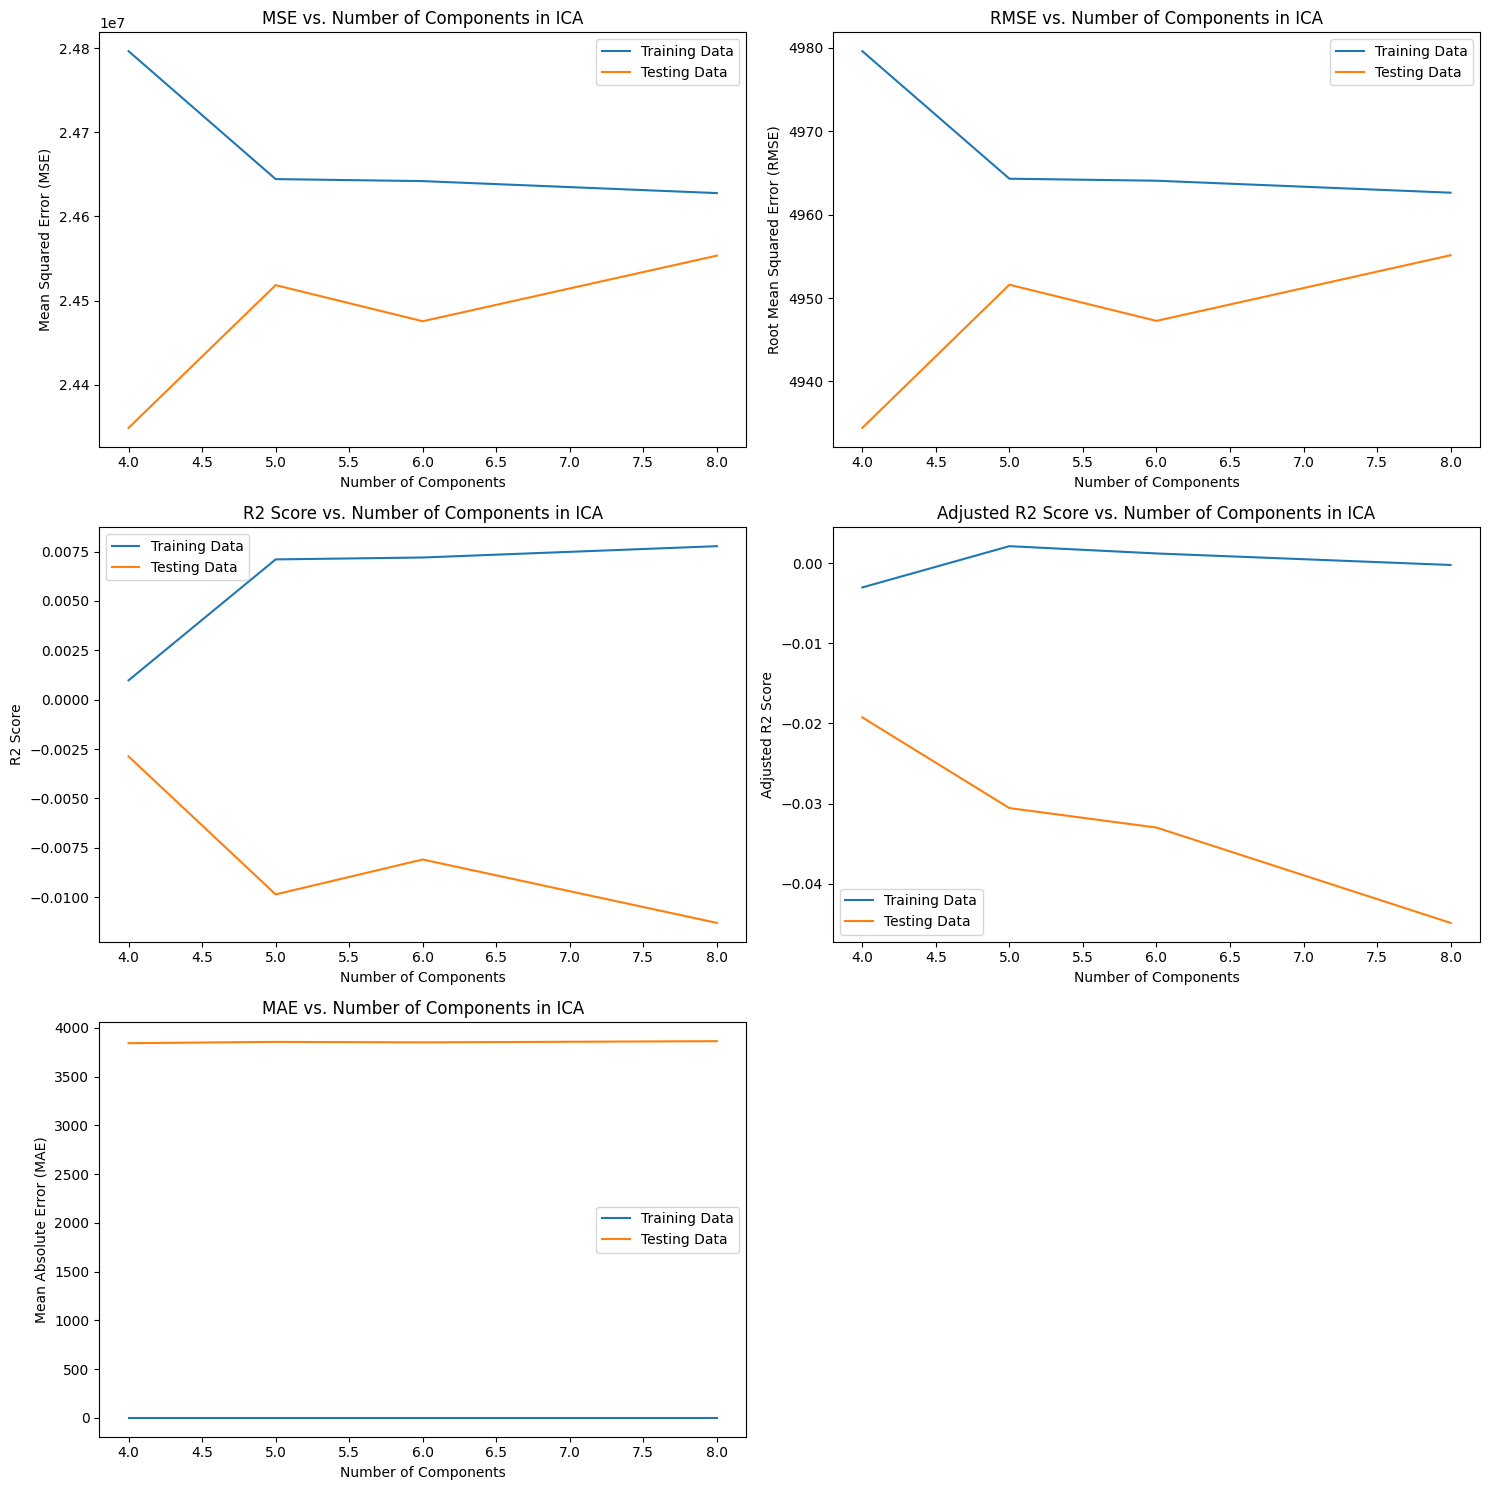

In [ ]:

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# Ploting MSE for training and testing data
ax[0, 0].plot(n_components, mse_train, label='Training Data')
ax[0, 0].plot(n_components, mse_test, label='Testing Data')


ax[0, 0].set_xlabel('Number of Components')
ax[0, 0].set_ylabel('Mean Squared Error (MSE)')
ax[0, 0].set_title('MSE vs. Number of Components in ICA')


ax[0, 0].legend()

# Ploting RMSE for training and testing data
ax[0, 1].plot(n_components, rmse_train, label='Training Data')
ax[0, 1].plot(n_components, rmse_test, label='Testing Data')


ax[0, 1].set_xlabel('Number of Components')
ax[0, 1].set_ylabel('Root Mean Squared Error (RMSE)')
ax[0, 1].set_title('RMSE vs. Number of Components in ICA')


ax[0, 1].legend()

# Ploting R2 for training and testing data
ax[1, 0].plot(n_components, r2_train, label='Training Data')
ax[1, 0].plot(n_components, r2_test, label='Testing Data')


ax[1, 0].set_xlabel('Number of Components')
ax[1, 0].set_ylabel('R2 Score')
ax[1, 0].set_title('R2 Score vs. Number of Components in ICA')


ax[1, 0].legend()

# Plot Adjusted R2 for training and testing data
ax[1, 1].plot(n_components, ar2_train, label='Training Data')
ax[1, 1].plot(n_components, ar2_test, label='Testing Data')


ax[1, 1].set_xlabel('Number of Components')
ax[1, 1].set_ylabel('Adjusted R2 Score')
ax[1, 1].set_title('Adjusted R2 Score vs. Number of Components in ICA')


ax[1, 1].legend()

#Ploting MAE for training and testing data
ax[2, 0].plot(n_components, mae_train, label='Training Data')
ax[2, 0].plot(n_components, mae_test, label='Testing Data')


ax[2, 0].set_xlabel('Number of Components')
ax[2, 0].set_ylabel('Mean Absolute Error (MAE)')
ax[2, 0].set_title('MAE vs. Number of Components in ICA')


ax[2, 0].legend()
fig.delaxes(ax[2,1])
plt.tight_layout()
plt.show()

### Part G

#### Preprocessed Data from part C

In [44]:
X_train

Building_Type  Construction_Year  Number_of_Floors  \
1194       1.370953          -0.194382          1.300569   
911        0.468416          -0.830450          1.564216   
422        0.468416           0.505292         -0.808604   
670        1.370953          -1.466517         -1.599544   
931       -1.336656          -0.830450          1.036922   
...             ...                ...               ...   
1044      -1.336656           1.268573          1.564216   
1095      -1.336656           1.014146         -0.281311   
1130      -1.336656          -0.703236          1.036922   
860       -0.434120           1.141359         -1.335898   
1126      -1.336656           0.886932         -1.072251   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
1194                   -0.807078                 -0.121631   
911                    -0.807078                  0.685145   
422                    -0.807078                  1.783092   
670                    -0.807078                  1.139766   
931                     1.969636                 -0.829188   
...                          ...                       ...   
1044                    1.969636                 -0.910141   
1095                   -0.807078                  0.963410   
1130                    1.175334                  1.783092   
860                     1.610057                 -0.910141   
1126                   -0.807078                 -0.566785   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
1194                   0.839266        0.198607           -1.022175   
911                   -0.842379       -1.119436           -1.144787   
422                    0.459648        0.858335           -0.941999   
670                   -1.063526       -0.210776            0.237029   
931                   -0.826465       -1.187105           -0.959913   
...                         ...             ...                 ...   
1044                  -0.744836        1.257758           -1.155522   
1095                  -1.439274       -1.015843            0.252991   
1130                  -0.573097       -1.834240            0.303169   
860                    0.967745        1.246476            0.854487   
1126                   0.962888       -0.053568            1.039825   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
1194            -0.060540        -0.548079                    -0.556191   
911             -0.681461        -0.548079                    -0.544184   
422              0.560381         1.824556                    -0.348638   
670             -0.681461         1.824556                     0.270676   
931              0.560381         1.824556                    -0.376221   
...                   ...              ...                          ...   
1044            -0.060540        -0.548079                    -0.160222   
1095            -0.371000        -0.548079                     1.125005   
1130            -0.371000         1.824556                     8.705015   
860             -0.371000        -0.548079                    -0.218676   
1126            -1.302382         1.824556                    -0.418174   

      Building_Status  Maintenance_Priority  Energy_Per_SqM  \
1194         0.050190             -0.017106       -1.707263   
911          0.050190             -0.017106        0.187861   
422          1.274336             -0.017106       -0.301689   
670          1.274336              1.204767        1.261821   
931          1.274336             -1.238979        1.925974   
...               ...                   ...             ...   
1044         0.050190              1.204767       -0.221856   
1095         0.050190             -0.017106       -0.125737   
1130         0.050190             -1.238979        0.294749   
860         -1.173956             -1.238979        0.170891   
1126         0.050190              1.204767        0.275169   

      Number_of_Residents  
1

In [45]:
y_train

1194    17591.376140
911     13847.735490
422     15398.443910
670     13197.166340
931     16815.610080
            ...     
1044    14828.987040
1095     5191.145924
1130    23362.030160
860      9398.009440
1126    10990.719530
Name: Electricity_Bill, Length: 1000, dtype: float64

### Reference :
https://medium.com/@abhishekjainindore24/elastic-net-regression-combined-features-of-l1-and-l2-regularization-6181a660c3a5


In [46]:
from sklearn.linear_model import ElasticNet

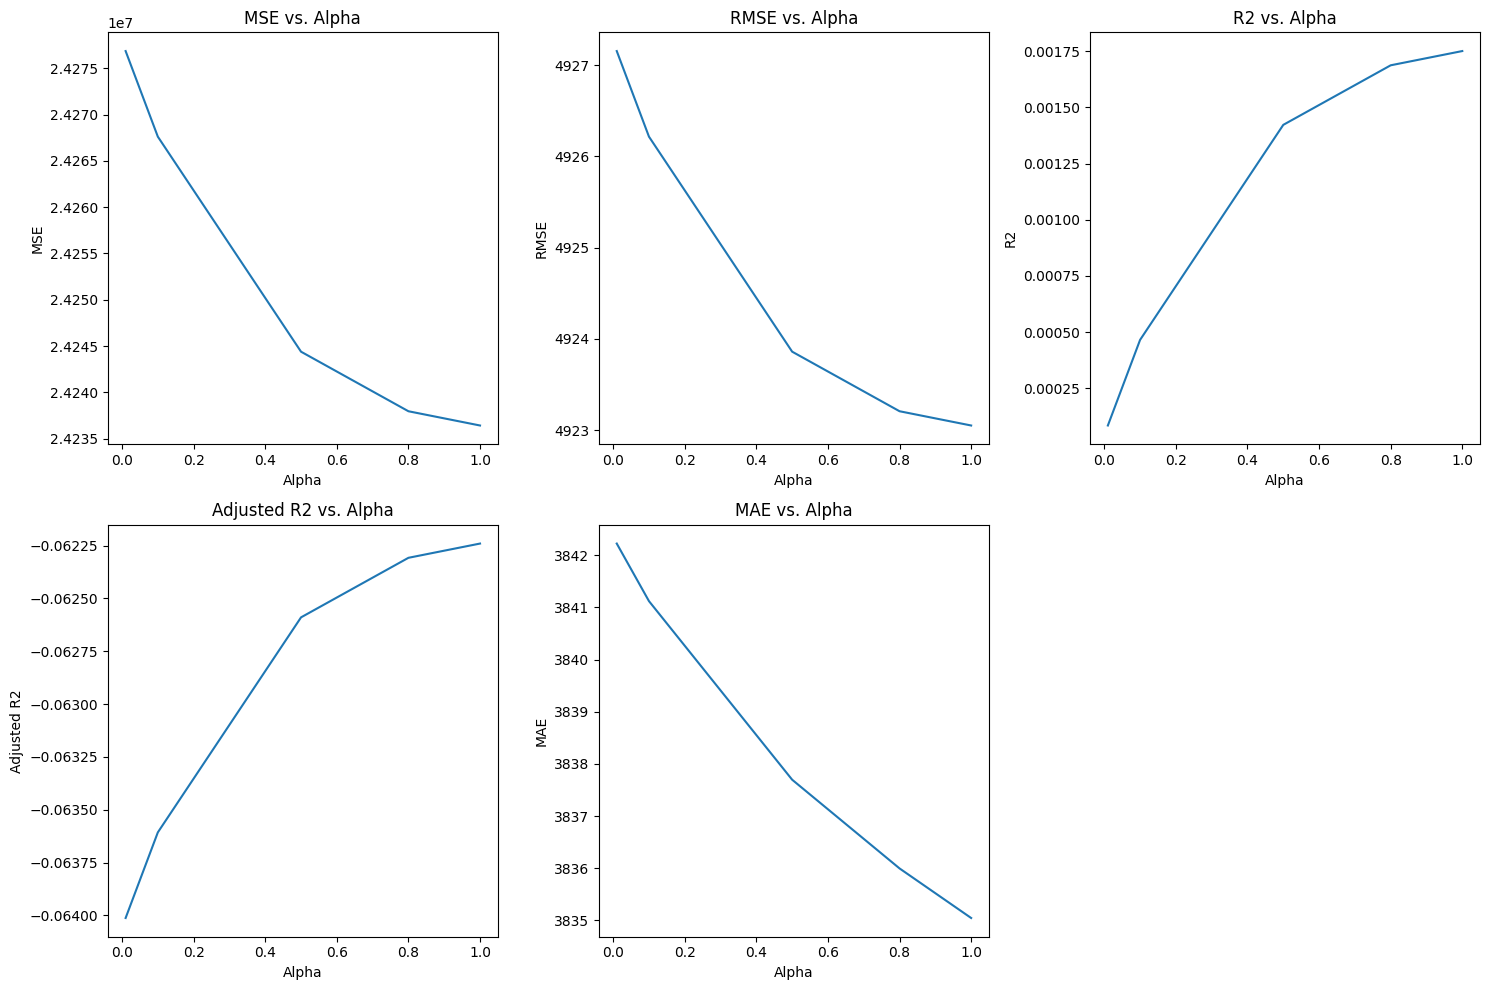

In [47]:
'''
Using  ElasticNet regularization and comparing across different values of alpha
'''

alphas = [0.01, 0.1, 0.5 , 0.8 , 1]


mse_valuesg = []
rmse_valuesg = []
r2_valuesg = []
ar2_valuesg = []
mae_valuesg = []
mse_valuesg_train = []
rmse_valuesg_train = []
r2_valuesg_train = []
ar2_valuesg_train = []
mae_valuesg_train = []


for alpha in alphas:
     #the ElasticNet model
    model = ElasticNet(alpha=alpha, l1_ratio=0.5)
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calculating evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    ar2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    mae = mean_absolute_error(y_test, y_pred)

    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)
    ar2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    mse_valuesg.append(mse)
    rmse_valuesg.append(rmse)
    r2_valuesg.append(r2)
    ar2_valuesg.append(ar2)
    mae_valuesg.append(mae)

    mse_valuesg_train.append(mse_train)
    rmse_valuesg_train.append(rmse_train)
    r2_valuesg_train.append(r2_train)
    ar2_valuesg_train.append(ar2_train)
    mae_valuesg_train.append(mae_train)


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# MSE
axs[0, 0].plot(alphas, mse_valuesg)
axs[0, 0].set_title('MSE vs. Alpha')
axs[0, 0].set_xlabel('Alpha')
axs[0, 0].set_ylabel('MSE')

# RMSE
axs[0, 1].plot(alphas, rmse_valuesg)
axs[0, 1].set_title('RMSE vs. Alpha')
axs[0, 1].set_xlabel('Alpha')
axs[0, 1].set_ylabel('RMSE')

# R2
axs[0, 2].plot(alphas, r2_valuesg)
axs[0, 2].set_title('R2 vs. Alpha')
axs[0, 2].set_xlabel('Alpha')
axs[0, 2].set_ylabel('R2')

# Adjusted R2
axs[1, 0].plot(alphas, ar2_valuesg)
axs[1, 0].set_title('Adjusted R2 vs. Alpha')
axs[1, 0].set_xlabel('Alpha')
axs[1, 0].set_ylabel('Adjusted R2')

# MAE
axs[1, 1].plot(alphas, mae_valuesg)
axs[1, 1].set_title('MAE vs. Alpha')
axs[1, 1].set_xlabel('Alpha')
axs[1, 1].set_ylabel('MAE')


fig.delaxes(axs[1, 2])
plt.tight_layout()
plt.show()

In [ ]:
print(mse_valuesg)
print(rmse_valuesg)
print(r2_valuesg)
print(ar2_valuesg)
print(mae_valuesg)

[24276857.894035783, 24267611.164532654, 24244394.469521772, 24237964.043351334, 24236425.434417684]
[4927.155152218751, 4926.216719200715, 4923.859712615884, 4923.206682981259, 4923.050419650167]
[8.505120317725545e-05, 0.000465905393534749, 0.0014221543654721058, 0.00168701068596544, 0.0017503828933501664]
[-0.06401206089918321, -0.06360679297867455, -0.06258924599571558, -0.06230741170595988, -0.062239977177589]
[3842.2249727301682, 3841.121423809543, 3837.6977729046394, 3835.9971701970267, 3835.0470411464416]


### Part H

### The dataset from part C

In [48]:
X_trainh

Building_Type  Construction_Year  Number_of_Floors  \
1194       1.370953          -0.194382          1.300569   
911        0.468416          -0.830450          1.564216   
422        0.468416           0.505292         -0.808604   
670        1.370953          -1.466517         -1.599544   
931       -1.336656          -0.830450          1.036922   
...             ...                ...               ...   
1044      -1.336656           1.268573          1.564216   
1095      -1.336656           1.014146         -0.281311   
1130      -1.336656          -0.703236          1.036922   
860       -0.434120           1.141359         -1.335898   
1126      -1.336656           0.886932         -1.072251   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
1194                   -0.807078                 -0.121631   
911                    -0.807078                  0.685145   
422                    -0.807078                  1.783092   
670                    -0.807078                  1.139766   
931                     1.969636                 -0.829188   
...                          ...                       ...   
1044                    1.969636                 -0.910141   
1095                   -0.807078                  0.963410   
1130                    1.175334                  1.783092   
860                     1.610057                 -0.910141   
1126                   -0.807078                 -0.566785   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
1194                   0.839266        0.198607           -1.022175   
911                   -0.842379       -1.119436           -1.144787   
422                    0.459648        0.858335           -0.941999   
670                   -1.063526       -0.210776            0.237029   
931                   -0.826465       -1.187105           -0.959913   
...                         ...             ...                 ...   
1044                  -0.744836        1.257758           -1.155522   
1095                  -1.439274       -1.015843            0.252991   
1130                  -0.573097       -1.834240            0.303169   
860                    0.967745        1.246476            0.854487   
1126                   0.962888       -0.053568            1.039825   

      Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
1194            -0.060540        -0.548079                    -0.556191   
911             -0.681461        -0.548079                    -0.544184   
422              0.560381         1.824556                    -0.348638   
670             -0.681461         1.824556                     0.270676   
931              0.560381         1.824556                    -0.376221   
...                   ...              ...                          ...   
1044            -0.060540        -0.548079                    -0.160222   
1095            -0.371000        -0.548079                     1.125005   
1130            -0.371000         1.824556                     8.705015   
860             -0.371000        -0.548079                    -0.218676   
1126            -1.302382         1.824556                    -0.418174   

      Building_Status  Maintenance_Priority  Energy_Per_SqM  \
1194         0.050190             -0.017106       -1.707263   
911          0.050190             -0.017106        0.187861   
422          1.274336             -0.017106       -0.301689   
670          1.274336              1.204767        1.261821   
931          1.274336             -1.238979        1.925974   
...               ...                   ...             ...   
1044         0.050190              1.204767       -0.221856   
1095         0.050190             -0.017106       -0.125737   
1130         0.050190             -1.238979        0.294749   
860         -1.173956             -1.238979        0.170891   
1126         0.050190              1.204767        0.275169   

      Number_of_Residents  
1

In [49]:
y_trainh

1194    17591.376140
911     13847.735490
422     15398.443910
670     13197.166340
931     16815.610080
            ...     
1044    14828.987040
1095     5191.145924
1130    23362.030160
860      9398.009440
1126    10990.719530
Name: Electricity_Bill, Length: 1000, dtype: float64

In [50]:

mse_test_h = []
mse_train_h = []
rmse_test_h = []
rmse_train_h = []
r2_test_h = []
r2_train_h = []
ar2_test_h = []
ar2_train_h = []
mae_test_h = []
mae_train_h = []

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
'''
Using the Gradient Boosting Regressor to perform regression on the preprocessed dataset from part (c).
'''

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_trainh, y_trainh)

# Making predictions
y_pred_trainh = gb_regressor.predict(X_trainh)
y_pred_testh = gb_regressor.predict(X_testh)


mset = mean_squared_error(y_trainh, y_pred_trainh)
rmset = np.sqrt(mset)
r2t = r2_score(y_trainh, y_pred_trainh)
# print("r2t " , r2t)
ar2t = 1 - (1-r2t)*(len(y_trainh)-1)/(len(y_trainh)-X_trainh.shape[1]-1)
# print("ar2t ",ar2t)
maet = mean_absolute_error(y_trainh, y_pred_trainh)

mse_train_h.append(mset)
rmse_train_h.append(rmset)
r2_train_h.append(r2t)
ar2_train_h.append(ar2t)
mae_train_h.append(maet)

mse = mean_squared_error(y_testh, y_pred_testh)
rmse = np.sqrt(mse)
r2 = r2_score(y_testh, y_pred_testh)
ar2 = 1 - (1-r2)*(len(y_testh)-1)/(len(y_testh)-X_testh.shape[1]-1)
mae = mean_absolute_error(y_testh, y_pred_testh)

mse_test_h.append(mse)
rmse_test_h.append(rmse)
r2_test_h.append(r2)
ar2_test_h.append(ar2)
mae_test_h.append(mae)



In [54]:
print("Training Data Results")
print("Mean Squared Error (MSE): ", mse_train_h[0])
print("Root Mean Squared Error (RMSE): ",rmse_train_h[0])
print("R2 score: ",r2_train_h[0])
print("Adjusted R2 score: ",ar2_train_h[0])
print("Mean Absolute error: ",mae_train_h[0])
print()
print("Testing Data Results")
print("Mean Squared Error (MSE): ",mse_test_h[0])
print("Root Mean Squared Error (RMSE): ",rmse_test_h[0])
print("R2 score: ",r2_test_h[0])
print("Adjusted R2 score ",ar2_test_h[0])
print("Mean Absolute error: ",mae_test_h[0])

Training Data Results
Mean Squared Error (MSE):  14926446.25730777
Root Mean Squared Error (RMSE):  3863.4759294329465
R2 score:  0.398626166333897
Adjusted R2 score:  0.38945888228410885
Mean Absolute error:  3092.7481886865007

Testing Data Results
Mean Squared Error (MSE):  24465723.08637143
Root Mean Squared Error (RMSE):  4946.283765249566
R2 score:  -0.007693926206012058
Adjusted R2 score  -0.07228969070639746
Mean Absolute error:  3816.6107652999817


### Comparsion Analysis

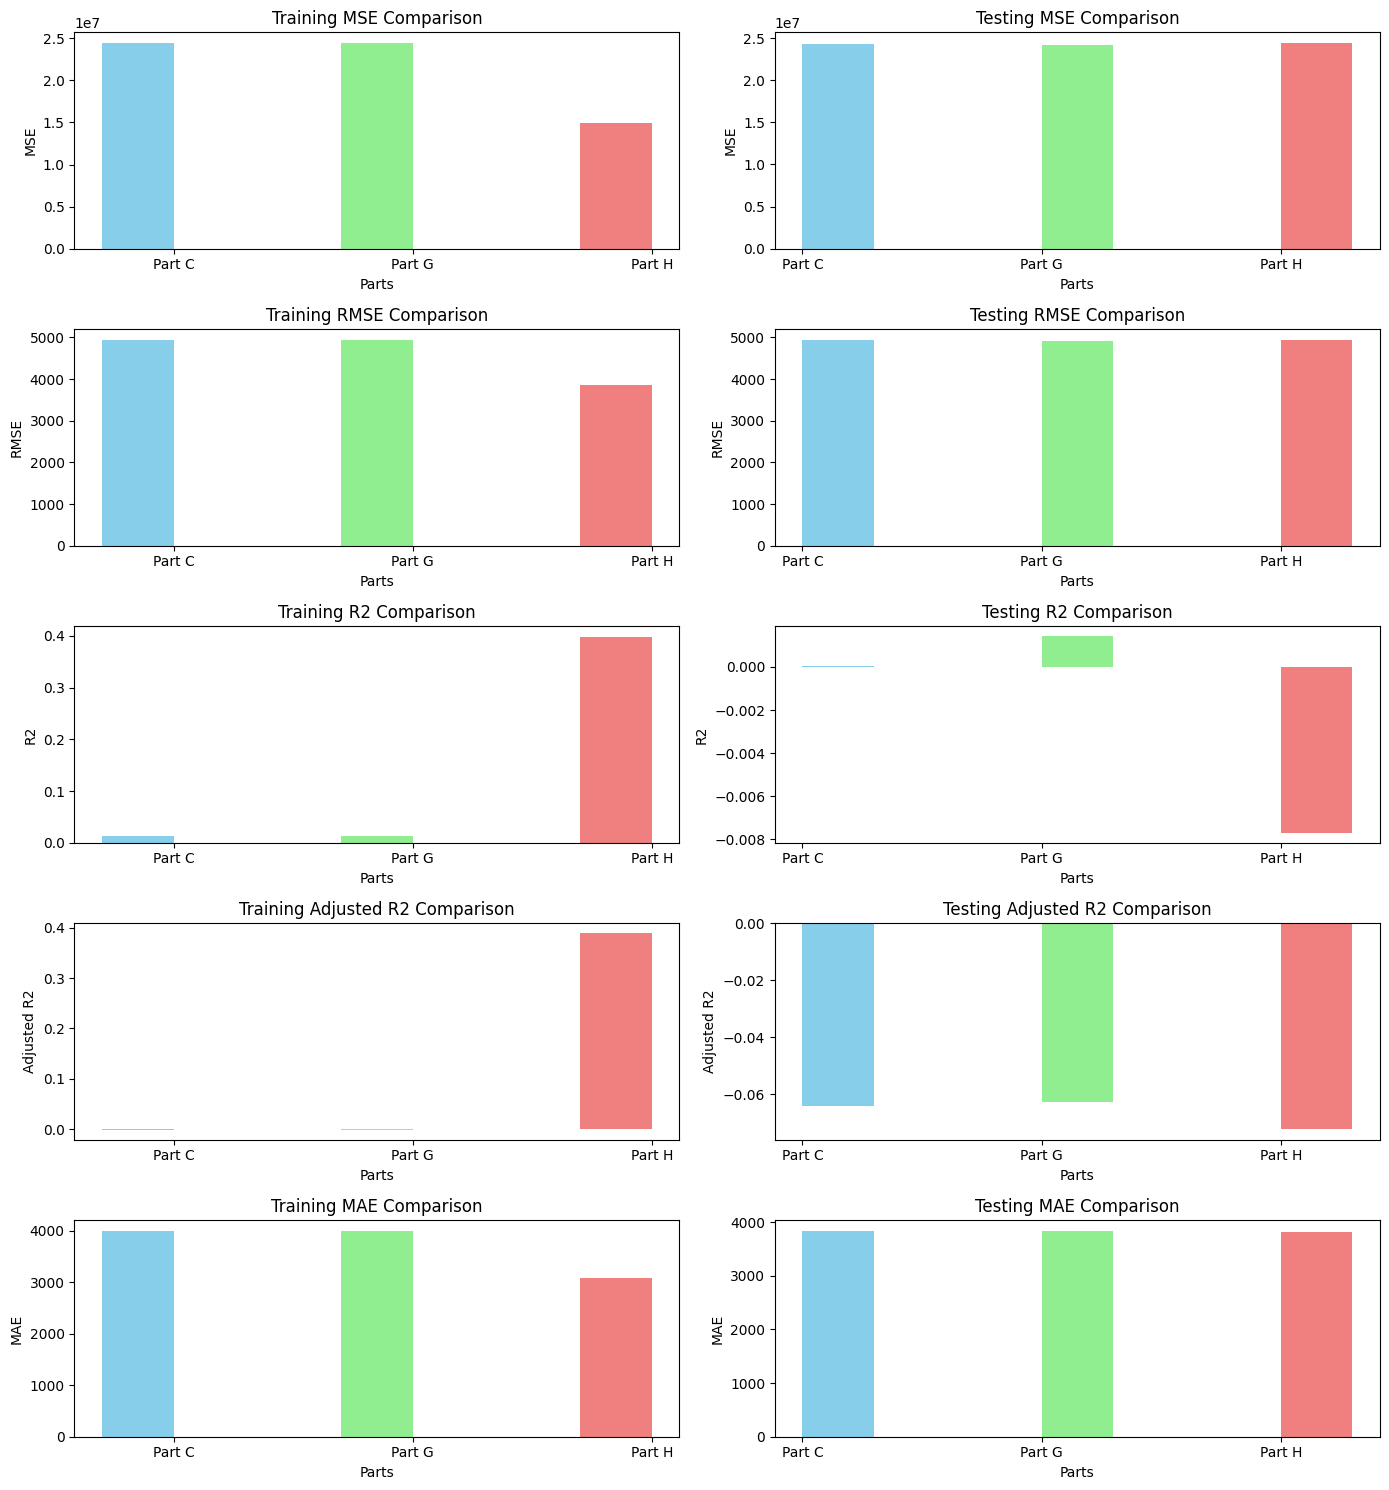

In [55]:
metrics = {
    'MSE': ([mse_train_a[0], mse_valuesg_train[2], mse_train_h[0]], [mse_test_a[0], mse_valuesg[2], mse_test_h[0]]),
    'RMSE': ([rmse_train_a[0], rmse_valuesg_train[2], rmse_train_h[0]], [rmse_test_a[0], rmse_valuesg[2], rmse_test_h[0]]),
    'R2': ([r2_train_a[0], r2_valuesg_train[2], r2_train_h[0]], [r2_test_a[0], r2_valuesg[2], r2_test_h[0]]),
    'Adjusted R2': ([ar2_train_a[0], ar2_valuesg_train[2], ar2_train_h[0]], [ar2_test_a[0], ar2_valuesg[2], ar2_test_h[0]]),
    'MAE': ([mae_train_a[0], mae_valuesg_train[2], mae_train_h[0]], [mae_test_a[0], mae_valuesg[2], mae_test_h[0]])
}

# Updated categories
categories = ['Part C', 'Part G', 'Part H']
bar_width = 0.3
bar_positions = np.arange(len(categories))

# Create the figure and axis objects
fig, axes = plt.subplots(5, 2, figsize=(14, 15))  # 5 rows, 2 columns

for i, (metric, (train_values, test_values)) in enumerate(metrics.items()):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]

    ax1.bar(bar_positions - bar_width / 2, train_values, color=['skyblue', 'lightgreen', 'lightcoral'], width=bar_width)
    ax1.set_xticks(bar_positions)
    ax1.set_xticklabels(categories)
    ax1.set_xlabel('Parts')
    ax1.set_ylabel(metric)
    ax1.set_title(f'Training {metric} Comparison')

    ax2.bar(bar_positions + bar_width / 2, test_values, color=['skyblue', 'lightgreen', 'lightcoral'], width=bar_width)
    ax2.set_xticks(bar_positions)
    ax2.set_xticklabels(categories)
    ax2.set_xlabel('Parts')
    ax2.set_ylabel(metric)
    ax2.set_title(f'Testing {metric} Comparison')


plt.tight_layout()
plt.show()